# Smart Energy Grid

Created by *Honey Patel*

Data courtesy: MGVCL Head Office Vadodara

## Loading the data

### Library imports

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

### Dataset import

In [2]:
dm=pd.read_csv('C:/Users/ombav/Generated_Realistic_Energy_Data_Grouped_Formatted.csv')
dm=dm.drop('Year', axis=1)
dm

Feeder name feeder type feeder category  \
0    66 KV ALEMBIC PHARMA          HT             EHT   
1    66 KV ALEMBIC PHARMA          HT             EHT   
2    66 KV ALEMBIC PHARMA          HT             EHT   
3    66 KV ALEMBIC PHARMA          HT             EHT   
4    66 KV ALEMBIC PHARMA          HT             EHT   
..                    ...         ...             ...   
247            VADHUNAGAR          LT           URBAN   
248            VADHUNAGAR          LT           URBAN   
249            VADHUNAGAR          LT           URBAN   
250            VADHUNAGAR          LT           URBAN   
251            VADHUNAGAR          LT           URBAN   

     SS2FEEDER Unites(Kwh)(8)  Feeder2SS UNites(Kwh)(9)  Consumer Export(10)  \
0                  9613735.02                      0.00                 0.00   
1                  9810935.06                      0.00                 0.00   
2                 10347446.28                      0.00                 0.00   
3                 11034486.09                      0.00                 0.00   
4                  9588978.55                      0.00                 0.00   
..                        ...                       ...                  ...   
247                5721806.02                    393.26            423541.31   
248                5393416.35                    393.55            436178.96   
249                5474131.21                    469.38            419958.50   
250                5046325.56                    462.29            416875.98   
251                5021941.19                    447.52            404836.31   

     Total Sentout(11=8-9+10)  LT Sold Out(12)  AGUN Sold(13)  AGRC Sold(14)  \
0                  9613735.02             0.00            0.0            0.0   
1                  9810935.06             0.00            0.0            0.0   
2                 10347446.28             0.00            0.0            0.0   
3                 11034486.09             0.00            0.0            0.0   
4                  9588978.55             0.00            0.0            0.0   
..                        ...              ...            ...            ...   
247                6144954.07       5416964.91            0.0            0.0   
248                5829201.77       5106070.88            0.0            0.0   
249                5893620.33       5182485.48            0.0            0.0   
250                5462739.26       4777472.08            0.0            0.0   
251                5426329.97       4754386.83            0.0            0.0   

     HT Sold(15)  Total BIlled UNites(16=12+13+14+15)  Consumer Import(17)  \
0     9616479.59                           9616479.59                 0.00   
1     9813735.93                           9813735.93                 0.00   
2    10350400.32                          10350400.32                 0.00   
3    11037636.27                          11037636.27                 0.00   
4     9591716.05                           9591716.05                 0.00   
..           ...                                  ...                  ...   
247         0.00                           5416964.91            513915.83   
248         0.00                           5106070.88            486924.71   
249         0.00                           5182485.48            445961.68   
250         0.00                           4777472.08            450505.74   
251         0.00                           4754386.83            481799.79   

     Net Assessed(Import)(18)  Total Soldout(19=16-18+17)  \
0                        0.00                  9616479.59   
1                        0.00                  9813735.93   
2                        0.00                 10350400.32   
3                        0.00                 11037636.27   
4                        0.00                  9591716.05   
..                        ...                         ...   
247                 133302.02              

In [3]:
dm.describe()

SS2FEEDER Unites(Kwh)(8)  Feeder2SS UNites(Kwh)(9)  \
count              2.520000e+02                252.000000   
mean               5.522478e+06              10857.149286   
std                2.965974e+06              20947.764451   
min                8.565760e+03                  0.000000   
25%                3.180532e+06                  0.000000   
50%                5.965799e+06                 41.075000   
75%                7.399542e+06              10670.710000   
max                1.237736e+07              89520.180000   

       Consumer Export(10)  Total Sentout(11=8-9+10)  LT Sold Out(12)  \
count         2.520000e+02              2.520000e+02     2.520000e+02   
mean          5.880852e+05              6.099706e+06     3.446166e+06   
std           6.625629e+05              3.175217e+06     2.855925e+06   
min           0.000000e+00              8.565760e+03     0.000000e+00   
25%           2.974025e+03              3.305255e+06     1.221792e+04   
50%           2.507366e+05              7.136809e+06     3.800001e+06   
75%           1.280190e+06              8.258045e+06     6.082788e+06   
max           2.015045e+06              1.240046e+07     8.827297e+06   

       AGUN Sold(13)  AGRC Sold(14)   HT Sold(15)  \
count     252.000000          252.0  2.520000e+02   
mean    12537.901865            0.0  2.090637e+06   
std     41101.495940            0.0  3.200988e+06   
min         0.000000            0.0  0.000000e+00   
25%         0.000000            0.0  0.000000e+00   
50%         0.000000            0.0  0.000000e+00   
75%         0.000000            0.0  3.627804e+06   
max    208136.120000            0.0  1.103764e+07   

       Total BIlled UNites(16=12+13+14+15)  Consumer Import(17)  \
count                         2.520000e+02         2.520000e+02   
mean                          5.549341e+06         5.523534e+05   
std                           2.966992e+06         6.191667e+05   
min                           8.508780e+03         0.000000e+00   
25%                           3.205786e+06         6.247375e+02   
50%                           6.188594e+06         1.503791e+05   
75%                           7.426972e+06         1.161949e+06   
max                           1.226140e+07         1.845531e+06   

       Net Assessed(Import)(18)  Total Soldout(19=16-18+17)  \
count                252.000000                2.520000e+02   
mean              142375.644087                5.959319e+06   
std               138216.560616                3.144039e+06   
min                    0.000000                8.508780e+03   
25%                    0.000000                3.174595e+06   
50%               130992.615000                7.077222e+06   
75%               273702.220000                8.112544e+06   
max               408408.480000                1.227601e+07   

       Unite Loss(20=11-19)  T%D Loss(%)(21=20/11)  
count            252.000000             252.000000  
mean          140387.593730               2.405198  
std           174613.077914               3.547787  
min          -165183.800000              -8.520000  
25%               66.430000               0.170000  
50%            92292.520000               1.680000  
75%           239966.350000               3.512500  
max           670649.110000              15.560000

In [4]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Feeder name                          252 non-null    object 
 1   feeder type                          252 non-null    object 
 2   feeder category                      252 non-null    object 
 3   SS2FEEDER Unites(Kwh)(8)             252 non-null    float64
 4   Feeder2SS UNites(Kwh)(9)             252 non-null    float64
 5   Consumer Export(10)                  252 non-null    float64
 6   Total Sentout(11=8-9+10)             252 non-null    float64
 7   LT Sold Out(12)                      252 non-null    float64
 8   AGUN Sold(13)                        252 non-null    float64
 9   AGRC Sold(14)                        252 non-null    float64
 10  HT Sold(15)                          252 non-null    float64
 11  Total BIlled UNites(16=12+13+14+

In [5]:
dm.columns

Index(['Feeder name', 'feeder type', 'feeder category',
       'SS2FEEDER Unites(Kwh)(8)', 'Feeder2SS UNites(Kwh)(9)',
       'Consumer Export(10)', 'Total Sentout(11=8-9+10)', 'LT Sold Out(12)',
       'AGUN Sold(13)', 'AGRC Sold(14)', 'HT Sold(15)',
       'Total BIlled UNites(16=12+13+14+15)', 'Consumer Import(17)',
       'Net Assessed(Import)(18)', 'Total Soldout(19=16-18+17)',
       'Unite Loss(20=11-19)', 'T%D Loss(%)(21=20/11)', 'Month'],
      dtype='object')

## Tranforming Non-Gaussian data into Gaussian

### Tranforming suitable columns with suitable method

#### Box Cox

Following columns have been transformed using `BoxCox` Method
* SS2FEEDER Unites(Kwh)(8)
* Total Sentout(11=8-9+10
* LT Sold Out(12)
* Total BIlled UNites(16=12+13+14+15)
* Consumer Import(17)
* Net Assessed(Import)(18)
* Total Soldout(19=16-18+17)
* Unite Loss(20=11-19)
* T%D Loss(%)(21=20/11)

In [6]:
columns=['SS2FEEDER Unites(Kwh)(8)','Total Sentout(11=8-9+10)','LT Sold Out(12)','Total BIlled UNites(16=12+13+14+15)',
              'Consumer Import(17)','Net Assessed(Import)(18)','Total Soldout(19=16-18+17)','Unite Loss(20=11-19)',
              'T%D Loss(%)(21=20/11)'] 

for column_name in columns:
    if column_name in dm.columns:
        column_data = dm[column_name]
        min_value = column_data.min()
        if min_value <= 0:
            column_data = column_data + abs(min_value) + 1
        column_data_transformed, _ = boxcox(column_data)
        dm[column_name] = column_data_transformed
    else:
        print(f"Column '{column_name}' not found in Sheet{sheet_index}")

#### Log Transform

Following column has been transformed using `log_transform`
* Consumer Export(10)

In [7]:
column_name = 'Consumer Export(10)'
if column_name in dm.columns:
    column_data = dm[column_name].values.reshape(-1, 1)
    column_data_log_transformed = np.log1p(column_data)
    dm[column_name] = column_data_log_transformed.flatten().tolist()

#### Quantile Transformation combined with Log Transformation and Standardization

Following column has been transformed using `Quantile Transform` combined with `Log Transform` and `Standardization`. We were required to use advanced techniques because the data in this column was multimodal data. Thus, making it Gaussian (Normal) was not feasible by regular methods.
* HT Sold(15)

First the data has been `log_transformed` then `Standardization` using `StandardScalar()` had been applied. Post this `QuntileTransformation` has been applied. Then `Shapiro-Wilk` test is used to determine whether a sample comes from a normal distribution. It tests the null hypothesis that the data was drawn from a normal distribution.

In [8]:
def transform_and_test(data):
    column_data = data.values
    
    if any(column_data <= 0):
        column_data = column_data + abs(column_data.min()) + 1

    column_data_log_transformed = np.log1p(column_data)
    
    scaler = StandardScaler()
    column_data_standardized = scaler.fit_transform(column_data_log_transformed.reshape(-1, 1))
    
    qt = QuantileTransformer(output_distribution='normal')
    column_data_transformed = qt.fit_transform(column_data_standardized)
    
    stat, p = shapiro(column_data_transformed)
    return column_data_transformed.flatten(), p

column_name = 'HT Sold(15)'
if column_name in dm.columns:
    column_data = dm[column_name]
    transformed_data, p_value = transform_and_test(column_data)
    dm[column_name] = transformed_data

P.S. The column HT Sold(15) appears to be MultiModal in nature. Thus, converting this into gaussian is not feasible. This Qunatile Tranfromation is combined with Log Transformation and Standardization to give a multi modal distribution.
Clustering the data mismatches the length of the column and thus is ommited.

### Plotting of all the Transformed columns in each sheet

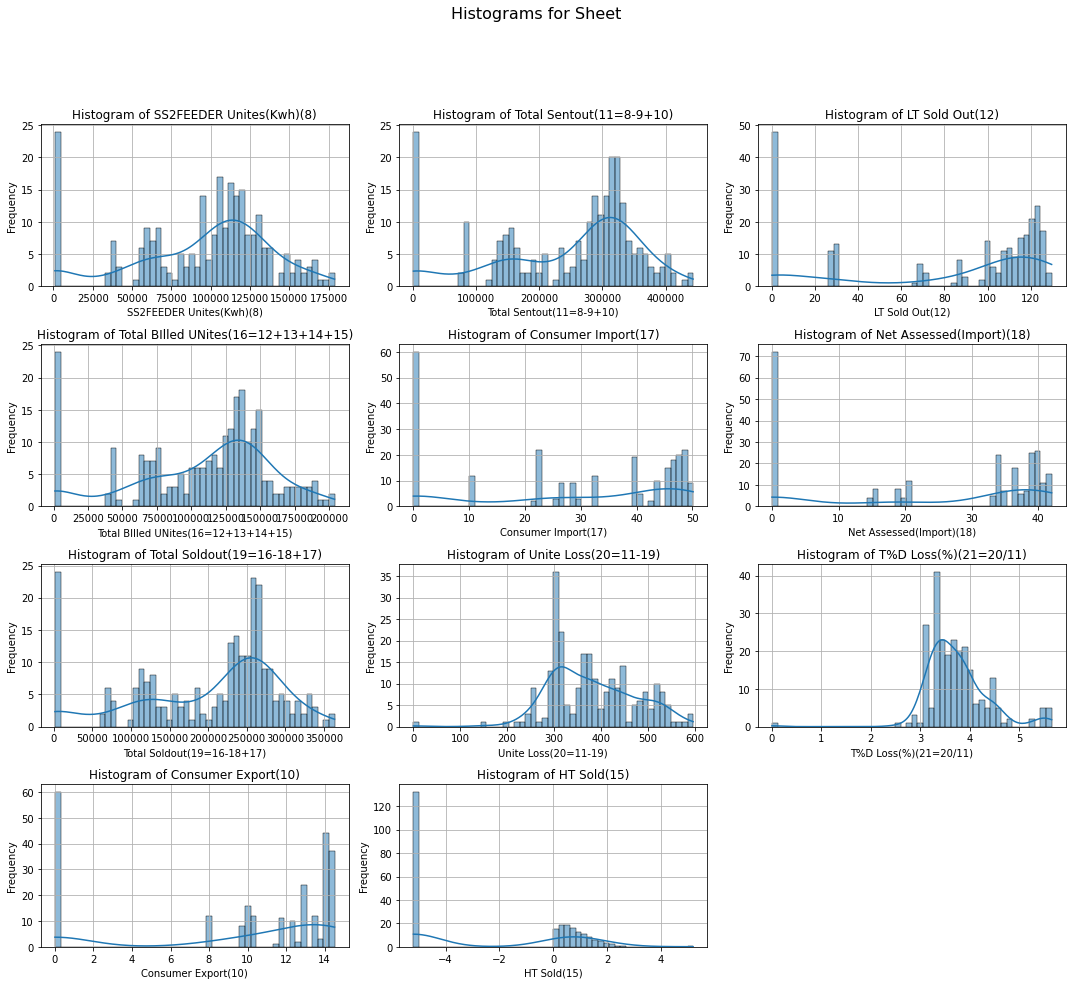

In [9]:
columns.append('Consumer Export(10)')
columns.append('HT Sold(15)')
plt.figure(figsize=(15, 30))
plt.suptitle(f'Histograms for Sheet', fontsize=16)
for i, column_name in enumerate(columns):
    plt.subplot(9, 3, i + 1)
    sns.histplot(dm[column_name], bins=50, edgecolor='black', kde=True)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print()

### Converting into DataFrame only with relevent columns

In [10]:
dm=dm.drop('AGUN Sold(13)',axis=1)
dm=dm.drop('AGRC Sold(14)',axis=1)
dm

Feeder name feeder type feeder category  \
0    66 KV ALEMBIC PHARMA          HT             EHT   
1    66 KV ALEMBIC PHARMA          HT             EHT   
2    66 KV ALEMBIC PHARMA          HT             EHT   
3    66 KV ALEMBIC PHARMA          HT             EHT   
4    66 KV ALEMBIC PHARMA          HT             EHT   
..                    ...         ...             ...   
247            VADHUNAGAR          LT           URBAN   
248            VADHUNAGAR          LT           URBAN   
249            VADHUNAGAR          LT           URBAN   
250            VADHUNAGAR          LT           URBAN   
251            VADHUNAGAR          LT           URBAN   

     SS2FEEDER Unites(Kwh)(8)  Feeder2SS UNites(Kwh)(9)  Consumer Export(10)  \
0               148964.812226                      0.00             0.000000   
1               151159.928922                      0.00             0.000000   
2               157070.690599                      0.00             0.000000   
3               164516.301895                      0.00             0.000000   
4               148688.352382                      0.00             0.000000   
..                        ...                       ...                  ...   
247             102500.658418                    393.26            12.956409   
248              98227.608761                    393.55            12.985810   
249              99284.467202                    469.38            12.947914   
250              93631.293256                    462.29            12.940546   
251              93305.119614                    447.52            12.911241   

     Total Sentout(11=8-9+10)  LT Sold Out(12)  HT Sold(15)  \
0               363541.121701         0.000000     1.591248   
1               369351.637868         0.000000     1.752538   
2               385032.531335         0.000000     2.055397   
3               404855.739906         0.000000     5.199338   
4               362809.834707         0.000000     1.556783   
..                        ...              ...          ...   
247             256306.889299       116.701570    -5.199338   
248             245962.766917       115.213934    -5.199338   
249             248082.901780       115.586089    -5.199338   
250             233801.897446       113.561488    -5.199338   
251             232584.076205       113.442051    -5.199338   

     Total BIlled UNites(16=12+13+14+15)  Consumer Import(17)  \
0                          170932.960035             0.000000   
1                          173484.703636             0.000000   
2                          180358.120587             0.000000   
3                          189021.121910             0.000000   
4                          170611.619889             0.000000   
..                                   ...                  ...   
247                        112439.964274            40.338465   
248                        107693.077300            39.965260   
249                        108866.885489            39.363683   
250                        102590.070967            39.432687   
251                        102228.061921            39.892414   

     Net Assessed(Import)(18)  Total Soldout(19=16-18+17)  \
0                    0.000000               301434.301991   
1                    0.000000               306173.301406   
2                    0.000000               318956.493669   
3                    0.000000               335104.477645   
4                    0.000000               300837.784756   
..                        ...                         ...   
247                 34.200574               204340.317906   
248                 34.486619               194960.139336   
249                 34.192968               196104.874884   
250                 33.946102               185171.851736   
251                 34.269990               185213.866794   

     Unite Loss(20=11-19)  T%D Loss(%)(21=20/11)              Month  
0              307.455975  

In [11]:
dm.describe()

SS2FEEDER Unites(Kwh)(8)  Feeder2SS UNites(Kwh)(9)  \
count                252.000000                252.000000   
mean               95446.414955              10857.149286   
std                43489.800897              20947.764451   
min                  944.169342                  0.000000   
25%                67141.140405                  0.000000   
50%               105631.180481                 41.075000   
75%               123361.310455              10670.710000   
max               178706.885719              89520.180000   

       Consumer Export(10)  Total Sentout(11=8-9+10)  LT Sold Out(12)  \
count           252.000000                252.000000       252.000000   
mean              9.583635             245720.382543        81.754451   
std               5.627534             114296.146919        48.106256   
min               0.000000               1507.450479         0.000000   
25%               7.998008             157922.131516        29.314126   
50%              12.432154             288077.771100       108.046709   
75%              14.062520             322849.499895       119.673105   
max              14.516152             443488.530842       129.719106   

       HT Sold(15)  Total BIlled UNites(16=12+13+14+15)  Consumer Import(17)  \
count   252.000000                           252.000000           252.000000   
mean     -2.312567                        109475.621426            28.541122   
std       3.071532                         50068.614552            18.930470   
min      -5.199338                          1009.565329             0.000000   
25%      -5.199338                         76675.901766            10.741332   
50%      -5.199338                        123916.129012            32.531870   
75%       0.674500                        141560.225711            46.358952   
max       5.199338                        204096.160286            50.109205   

       Net Assessed(Import)(18)  Total Soldout(19=16-18+17)  \
count                252.000000                  252.000000   
mean                  24.298757               200743.854928   
std                   16.908096                93722.864156   
min                    0.000000                 1358.937744   
25%                    0.000000               128650.200827   
50%                   34.089505               238175.482485   
75%                   39.046783               264514.921278   
max                   41.989132               363629.347123   

       Unite Loss(20=11-19)  T%D Loss(%)(21=20/11)  
count            252.000000             252.000000  
mean             381.563206               3.730870  
std               91.315364               0.624108  
min                0.000000               0.000000  
25%              309.602094               3.345140  
50%              370.538928               3.652831  
75%              445.146321               3.990508  
max              596.495249               5.654029

In [12]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Feeder name                          252 non-null    object 
 1   feeder type                          252 non-null    object 
 2   feeder category                      252 non-null    object 
 3   SS2FEEDER Unites(Kwh)(8)             252 non-null    float64
 4   Feeder2SS UNites(Kwh)(9)             252 non-null    float64
 5   Consumer Export(10)                  252 non-null    float64
 6   Total Sentout(11=8-9+10)             252 non-null    float64
 7   LT Sold Out(12)                      252 non-null    float64
 8   HT Sold(15)                          252 non-null    float64
 9   Total BIlled UNites(16=12+13+14+15)  252 non-null    float64
 10  Consumer Import(17)                  252 non-null    float64
 11  Net Assessed(Import)(18)        

In [13]:
dm.columns

Index(['Feeder name', 'feeder type', 'feeder category',
       'SS2FEEDER Unites(Kwh)(8)', 'Feeder2SS UNites(Kwh)(9)',
       'Consumer Export(10)', 'Total Sentout(11=8-9+10)', 'LT Sold Out(12)',
       'HT Sold(15)', 'Total BIlled UNites(16=12+13+14+15)',
       'Consumer Import(17)', 'Net Assessed(Import)(18)',
       'Total Soldout(19=16-18+17)', 'Unite Loss(20=11-19)',
       'T%D Loss(%)(21=20/11)', 'Month'],
      dtype='object')

### Saving the DataFrame as CSV

In [14]:
i = dm[((dm['Feeder name'] == None))].index
dm=dm.dropna()
dm.to_csv('gorwa_gaussian_transformed.csv', index=False)
dm=pd.read_csv('gorwa_gaussian_transformed.csv')

## Data Modelling to detect Anomaly 

For anaomaly detection in all the columns 5 mthods were tried:
* OneClass SVM
* Isolation forest
* Local Factor Outlier
* IQR
* Isolation Forest

Out of these `Isolation Forest` performed the best on all the columns

### Library Import

In [15]:
from sklearn.ensemble import IsolationForest

### T&D Loss

As T&D Loss is in percentage format, outlier or anomaly detection has been performed on the entire dataset as a whole. Across all the Feeders

In [16]:
tnd=dm[['Feeder name','T%D Loss(%)(21=20/11)']]
tnd

Feeder name  T%D Loss(%)(21=20/11)
0    66 KV ALEMBIC PHARMA               3.301997
1    66 KV ALEMBIC PHARMA               3.301997
2    66 KV ALEMBIC PHARMA               3.301997
3    66 KV ALEMBIC PHARMA               3.301997
4    66 KV ALEMBIC PHARMA               3.301997
..                    ...                    ...
247            VADHUNAGAR               4.345859
248            VADHUNAGAR               4.468562
249            VADHUNAGAR               4.517092
250            VADHUNAGAR               4.498970
251            VADHUNAGAR               4.399187

[252 rows x 2 columns]

#### Isolation Forest

In [17]:
tdvalues = tnd['T%D Loss(%)(21=20/11)'].values.reshape(-1, 1)
iso_forest = IsolationForest(n_estimators=7, contamination=0.22, random_state=42)
outlier_pred = iso_forest.fit_predict(tdvalues)
outliers = tnd[outlier_pred == -1]
outliers[['Feeder name','T%D Loss(%)(21=20/11)']]

Feeder name  T%D Loss(%)(21=20/11)
36            DWARKESH               4.248113
46            DWARKESH               4.062868
84   GUJ.HOUSING BOARD               4.626890
85   GUJ.HOUSING BOARD               4.557539
88   GUJ.HOUSING BOARD               4.720692
89   GUJ.HOUSING BOARD               4.511062
90   GUJ.HOUSING BOARD               4.388273
91   GUJ.HOUSING BOARD               4.619574
92   GUJ.HOUSING BOARD               4.781466
94   GUJ.HOUSING BOARD               4.272403
95   GUJ.HOUSING BOARD               4.796856
114      KARODIYA ROAD               4.093595
120               LABH               5.625844
121               LABH               5.440735
122               LABH               5.521591
123               LABH               5.460806
124               LABH               5.579199
125               LABH               5.439551
126               LABH               5.563150
127               LABH               5.280161
128               LABH               5.553951
129               LABH               5.224337
130               LABH               5.654029
131               LABH               5.494817
144        SAHYOG ROAD               2.897710
147        SAHYOG ROAD               3.081168
150        SAHYOG ROAD               3.220526
163              SAMTA               2.793625
164              SAMTA               3.191370
170           SANGRILA               3.062393
175           SANGRILA               3.213823
188        SHREENATHJI               2.983646
193     SUBHANPIRA SST               3.231665
194     SUBHANPIRA SST               2.507730
197     SUBHANPIRA SST               2.839795
200     SUBHANPIRA SST               0.000000
201     SUBHANPIRA SST               2.920056
204    SUBHANPURA ROAD               4.330020
206    SUBHANPURA ROAD               4.185810
207    SUBHANPURA ROAD               4.239979
208    SUBHANPURA ROAD               4.326844
210    SUBHANPURA ROAD               4.145874
211    SUBHANPURA ROAD               4.113927
212    SUBHANPURA ROAD               4.154232
213    SUBHANPURA ROAD               4.256228
214    SUBHANPURA ROAD               4.167563
218   SWAMI VIVEKANAND               4.033591
221   SWAMI VIVEKANAND               4.059437
222   SWAMI VIVEKANAND               4.096992
223   SWAMI VIVEKANAND               4.037048
242         VADHUNAGAR               4.569437
245         VADHUNAGAR               4.506532
246         VADHUNAGAR               4.594592
247         VADHUNAGAR               4.345859
249         VADHUNAGAR               4.517092
251         VADHUNAGAR               4.399187

In [18]:
tnd.insert(2, 'Outliers', outlier_pred, True)
tnd.to_csv('gorwa_tnd_outlier.csv', index=False)
tnd

Feeder name  T%D Loss(%)(21=20/11)  Outliers
0    66 KV ALEMBIC PHARMA               3.301997         1
1    66 KV ALEMBIC PHARMA               3.301997         1
2    66 KV ALEMBIC PHARMA               3.301997         1
3    66 KV ALEMBIC PHARMA               3.301997         1
4    66 KV ALEMBIC PHARMA               3.301997         1
..                    ...                    ...       ...
247            VADHUNAGAR               4.345859        -1
248            VADHUNAGAR               4.468562         1
249            VADHUNAGAR               4.517092        -1
250            VADHUNAGAR               4.498970         1
251            VADHUNAGAR               4.399187        -1

[252 rows x 3 columns]

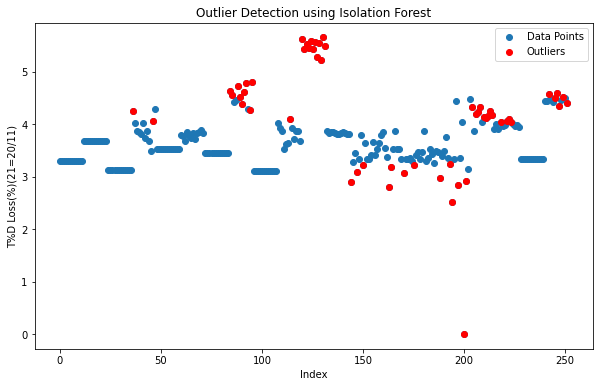

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(tdvalues)), tdvalues, label='Data Points')
plt.scatter(outliers.index, outliers['T%D Loss(%)(21=20/11)'], color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('T%D Loss(%)(21=20/11)')
plt.legend()
plt.title('Outlier Detection using Isolation Forest')
plt.show()

### Total Sentout

In [20]:
sentout=dm[['Feeder name','Total Sentout(11=8-9+10)']]
sentout

Feeder name  Total Sentout(11=8-9+10)
0    66 KV ALEMBIC PHARMA             363541.121701
1    66 KV ALEMBIC PHARMA             369351.637868
2    66 KV ALEMBIC PHARMA             385032.531335
3    66 KV ALEMBIC PHARMA             404855.739906
4    66 KV ALEMBIC PHARMA             362809.834707
..                    ...                       ...
247            VADHUNAGAR             256306.889299
248            VADHUNAGAR             245962.766917
249            VADHUNAGAR             248082.901780
250            VADHUNAGAR             233801.897446
251            VADHUNAGAR             232584.076205

[252 rows x 2 columns]

In [21]:
feeders=sentout['Feeder name'].unique()
feeders

array(['66 KV ALEMBIC PHARMA', 'B.I.D.C.', 'BHAILAL AMIN HOSPITAL',
       'DWARKESH', 'GOODIES', 'GORWA GAM', 'GORWAS SST',
       'GUJ.HOUSING BOARD', 'INORBIL MALL', 'KARODIYA ROAD', 'LABH',
       'PANCHAVATI', 'SAHYOG ROAD', 'SAMTA', 'SANGRILA', 'SHREENATHJI',
       'SUBHANPIRA SST', 'SUBHANPURA ROAD', 'SWAMI VIVEKANAND', 'TCD LTD',
       'VADHUNAGAR'], dtype=object)

#### Isolation Forest

66 KV ALEMBIC PHARMA
            Feeder name  Total Sentout(11=8-9+10)
2  66 KV ALEMBIC PHARMA             385032.531335
3  66 KV ALEMBIC PHARMA             404855.739906
6  66 KV ALEMBIC PHARMA             333600.798611

B.I.D.C.
   Feeder name  Total Sentout(11=8-9+10)
14    B.I.D.C.             208603.694329
16    B.I.D.C.             181955.486332
18    B.I.D.C.             168698.868979

BHAILAL AMIN HOSPITAL
              Feeder name  Total Sentout(11=8-9+10)
27  BHAILAL AMIN HOSPITAL             168056.178797
30  BHAILAL AMIN HOSPITAL             141859.233109
33  BHAILAL AMIN HOSPITAL             163658.799148

DWARKESH
   Feeder name  Total Sentout(11=8-9+10)
36    DWARKESH             249194.588085
37    DWARKESH             283634.266940
44    DWARKESH             276240.149993

GOODIES
   Feeder name  Total Sentout(11=8-9+10)
48     GOODIES             384803.059528
49     GOODIES             416145.650552
54     GOODIES             356478.577260

GORWA GAM
   Feeder name  

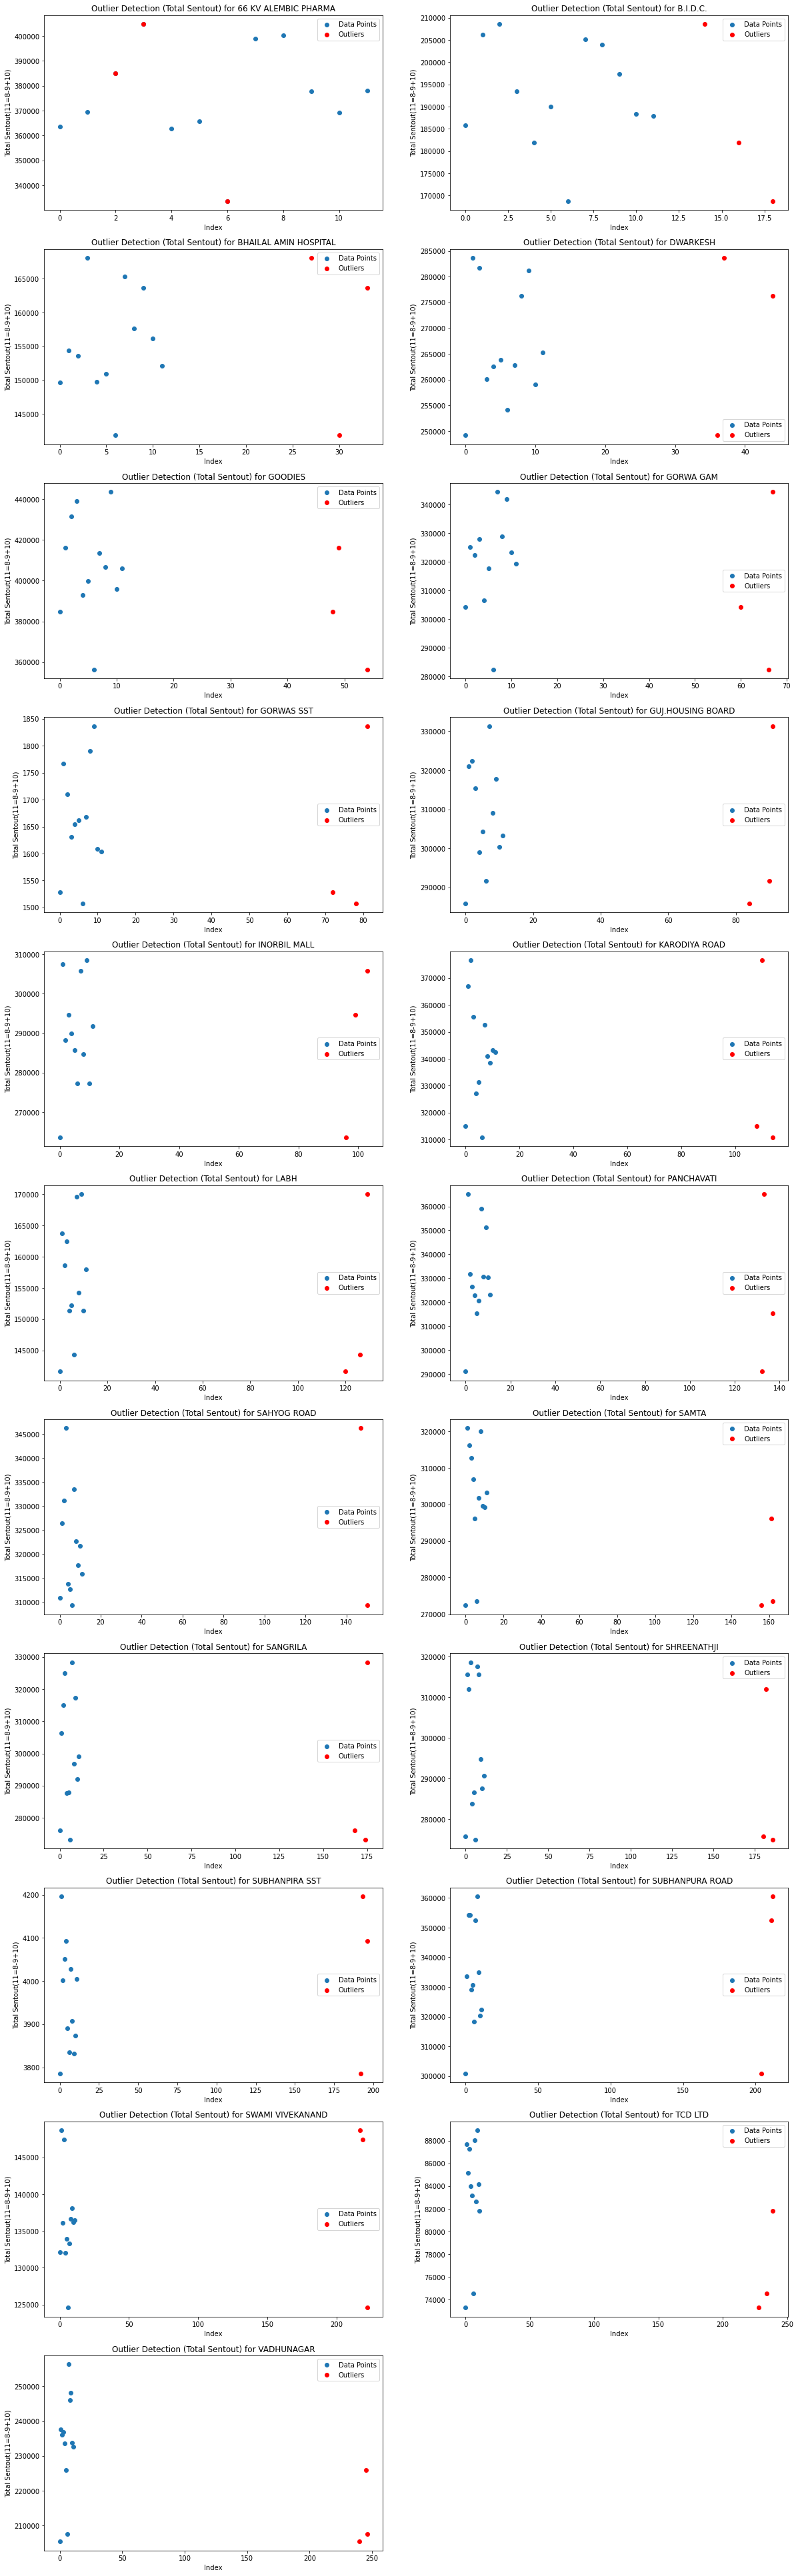

In [22]:
new=pd.DataFrame()
ctr=0
plt.figure(figsize=(20, 70))
for i in feeders:
    ctr+=1
    select_prod = sentout.loc[sentout['Feeder name'] == i]
    sentoutvalues = select_prod['Total Sentout(11=8-9+10)'].values.reshape(-1, 1)
    iso_forest = IsolationForest(n_estimators=7, contamination=0.22, random_state=42)
    outlier_pred = iso_forest.fit_predict(sentoutvalues)
    outliers = select_prod[outlier_pred == -1]
    select_prod.insert(2, 'Outliers', outlier_pred, True)
    new=new.append(select_prod)
    print(i)
    print(outliers[['Feeder name','Total Sentout(11=8-9+10)']])
    print()
    plt.subplot(11,2,ctr)
    plt.scatter(range(len(sentoutvalues)), sentoutvalues, label='Data Points')
    plt.scatter(outliers.index, outliers['Total Sentout(11=8-9+10)'], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel('Total Sentout(11=8-9+10)')
    plt.legend()
    plt.title(f'Outlier Detection (Total Sentout) for {i}')
plt.show()

In [23]:
new.to_csv('gorwa_totalsentout_outlier.csv', index=False)
new

Feeder name  Total Sentout(11=8-9+10)  Outliers
0    66 KV ALEMBIC PHARMA             363541.121701         1
1    66 KV ALEMBIC PHARMA             369351.637868         1
2    66 KV ALEMBIC PHARMA             385032.531335        -1
3    66 KV ALEMBIC PHARMA             404855.739906        -1
4    66 KV ALEMBIC PHARMA             362809.834707         1
..                    ...                       ...       ...
247            VADHUNAGAR             256306.889299         1
248            VADHUNAGAR             245962.766917         1
249            VADHUNAGAR             248082.901780         1
250            VADHUNAGAR             233801.897446         1
251            VADHUNAGAR             232584.076205         1

[252 rows x 3 columns]

### LT Sold Out

In [24]:
lt=dm[['Feeder name','LT Sold Out(12)']]
lt

Feeder name  LT Sold Out(12)
0    66 KV ALEMBIC PHARMA         0.000000
1    66 KV ALEMBIC PHARMA         0.000000
2    66 KV ALEMBIC PHARMA         0.000000
3    66 KV ALEMBIC PHARMA         0.000000
4    66 KV ALEMBIC PHARMA         0.000000
..                    ...              ...
247            VADHUNAGAR       116.701570
248            VADHUNAGAR       115.213934
249            VADHUNAGAR       115.586089
250            VADHUNAGAR       113.561488
251            VADHUNAGAR       113.442051

[252 rows x 2 columns]

#### Isolation Forest

66 KV ALEMBIC PHARMA
Empty DataFrame
Columns: [Feeder name, LT Sold Out(12)]
Index: []

B.I.D.C.
   Feeder name  LT Sold Out(12)
14    B.I.D.C.        71.098047
16    B.I.D.C.        68.378160
18    B.I.D.C.        66.915181

BHAILAL AMIN HOSPITAL
Empty DataFrame
Columns: [Feeder name, LT Sold Out(12)]
Index: []

DWARKESH
   Feeder name  LT Sold Out(12)
36    DWARKESH       113.523235
42    DWARKESH       114.864589
44    DWARKESH       117.963795

GOODIES
   Feeder name  LT Sold Out(12)
48     GOODIES        85.870234
54     GOODIES        84.036012

GORWA GAM
   Feeder name  LT Sold Out(12)
60   GORWA GAM       107.221701
66   GORWA GAM       104.998665
67   GORWA GAM       111.163589

GORWAS SST
   Feeder name  LT Sold Out(12)
72  GORWAS SST        26.949492
78  GORWAS SST        26.836698
81  GORWAS SST        28.547596

GUJ.HOUSING BOARD
          Feeder name  LT Sold Out(12)
84  GUJ.HOUSING BOARD       114.680747
87  GUJ.HOUSING BOARD       118.064214
90  GUJ.HOUSING BOARD       

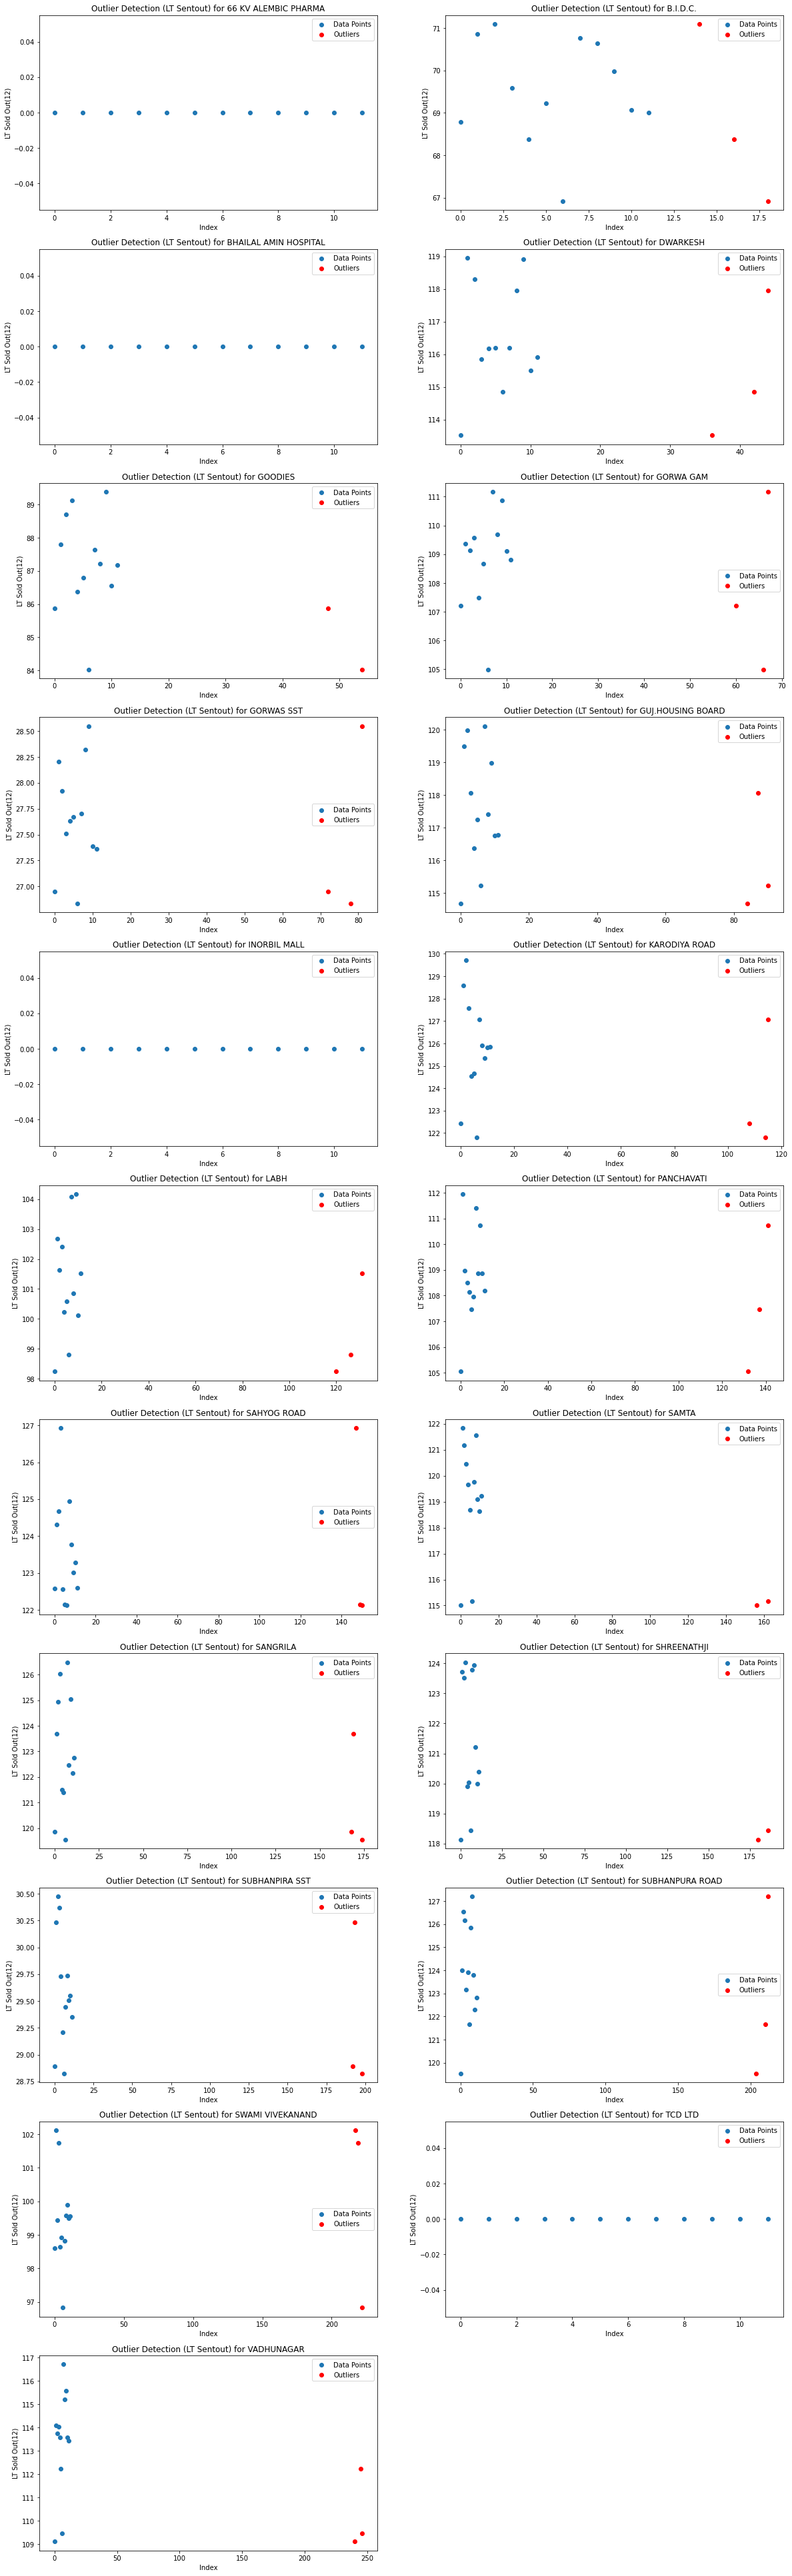

In [25]:
new=pd.DataFrame()
ctr=0
plt.figure(figsize=(20, 70))
for i in feeders:
    ctr+=1
    select_prod = lt.loc[lt['Feeder name'] == i]
    ltvalues = select_prod['LT Sold Out(12)'].values.reshape(-1,1)
    iso_forest = IsolationForest(n_estimators=7, contamination=0.22, random_state=42)
    outlier_pred = iso_forest.fit_predict(ltvalues)
    outliers = select_prod[outlier_pred == -1]
    select_prod.insert(2, 'Outliers', outlier_pred, True)
    new=new.append(select_prod)
    print(i)
    print(outliers[['Feeder name','LT Sold Out(12)']])
    print()
    plt.subplot(11,2,ctr)
    plt.scatter(range(len(ltvalues)), ltvalues, label='Data Points')
    plt.scatter(outliers.index, outliers['LT Sold Out(12)'], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel('LT Sold Out(12)')
    plt.legend()
    plt.title(f'Outlier Detection (LT Sentout) for {i}')
plt.show()

In [26]:
new.to_csv('gorwa_ltsentout_outlier.csv', index=False)
new

Feeder name  LT Sold Out(12)  Outliers
0    66 KV ALEMBIC PHARMA         0.000000         1
1    66 KV ALEMBIC PHARMA         0.000000         1
2    66 KV ALEMBIC PHARMA         0.000000         1
3    66 KV ALEMBIC PHARMA         0.000000         1
4    66 KV ALEMBIC PHARMA         0.000000         1
..                    ...              ...       ...
247            VADHUNAGAR       116.701570         1
248            VADHUNAGAR       115.213934         1
249            VADHUNAGAR       115.586089         1
250            VADHUNAGAR       113.561488         1
251            VADHUNAGAR       113.442051         1

[252 rows x 3 columns]

### HT Sold Out

In [27]:
ht=dm[['Feeder name','HT Sold(15)']]
ht

Feeder name  HT Sold(15)
0    66 KV ALEMBIC PHARMA     1.591248
1    66 KV ALEMBIC PHARMA     1.752538
2    66 KV ALEMBIC PHARMA     2.055397
3    66 KV ALEMBIC PHARMA     5.199338
4    66 KV ALEMBIC PHARMA     1.556783
..                    ...          ...
247            VADHUNAGAR    -5.199338
248            VADHUNAGAR    -5.199338
249            VADHUNAGAR    -5.199338
250            VADHUNAGAR    -5.199338
251            VADHUNAGAR    -5.199338

[252 rows x 2 columns]

#### Isolation Forest

66 KV ALEMBIC PHARMA
            Feeder name  HT Sold(15)
3  66 KV ALEMBIC PHARMA     5.199338
6  66 KV ALEMBIC PHARMA     1.355373
8  66 KV ALEMBIC PHARMA     2.653417

B.I.D.C.
   Feeder name  HT Sold(15)
14    B.I.D.C.     0.858823
18    B.I.D.C.     0.449063

BHAILAL AMIN HOSPITAL
              Feeder name  HT Sold(15)
27  BHAILAL AMIN HOSPITAL     0.646542
30  BHAILAL AMIN HOSPITAL     0.438044
33  BHAILAL AMIN HOSPITAL     0.574341

DWARKESH
Empty DataFrame
Columns: [Feeder name, HT Sold(15)]
Index: []

GOODIES
   Feeder name  HT Sold(15)
50     GOODIES     1.979064
54     GOODIES     1.330763
57     GOODIES     2.258663

GORWA GAM
   Feeder name  HT Sold(15)
66   GORWA GAM     0.527841
67   GORWA GAM     0.948983
69   GORWA GAM     0.902985

GORWAS SST
Empty DataFrame
Columns: [Feeder name, HT Sold(15)]
Index: []

GUJ.HOUSING BOARD
          Feeder name  HT Sold(15)
84  GUJ.HOUSING BOARD     0.185815
87  GUJ.HOUSING BOARD     0.257474
91  GUJ.HOUSING BOARD     0.299000

INORBIL 

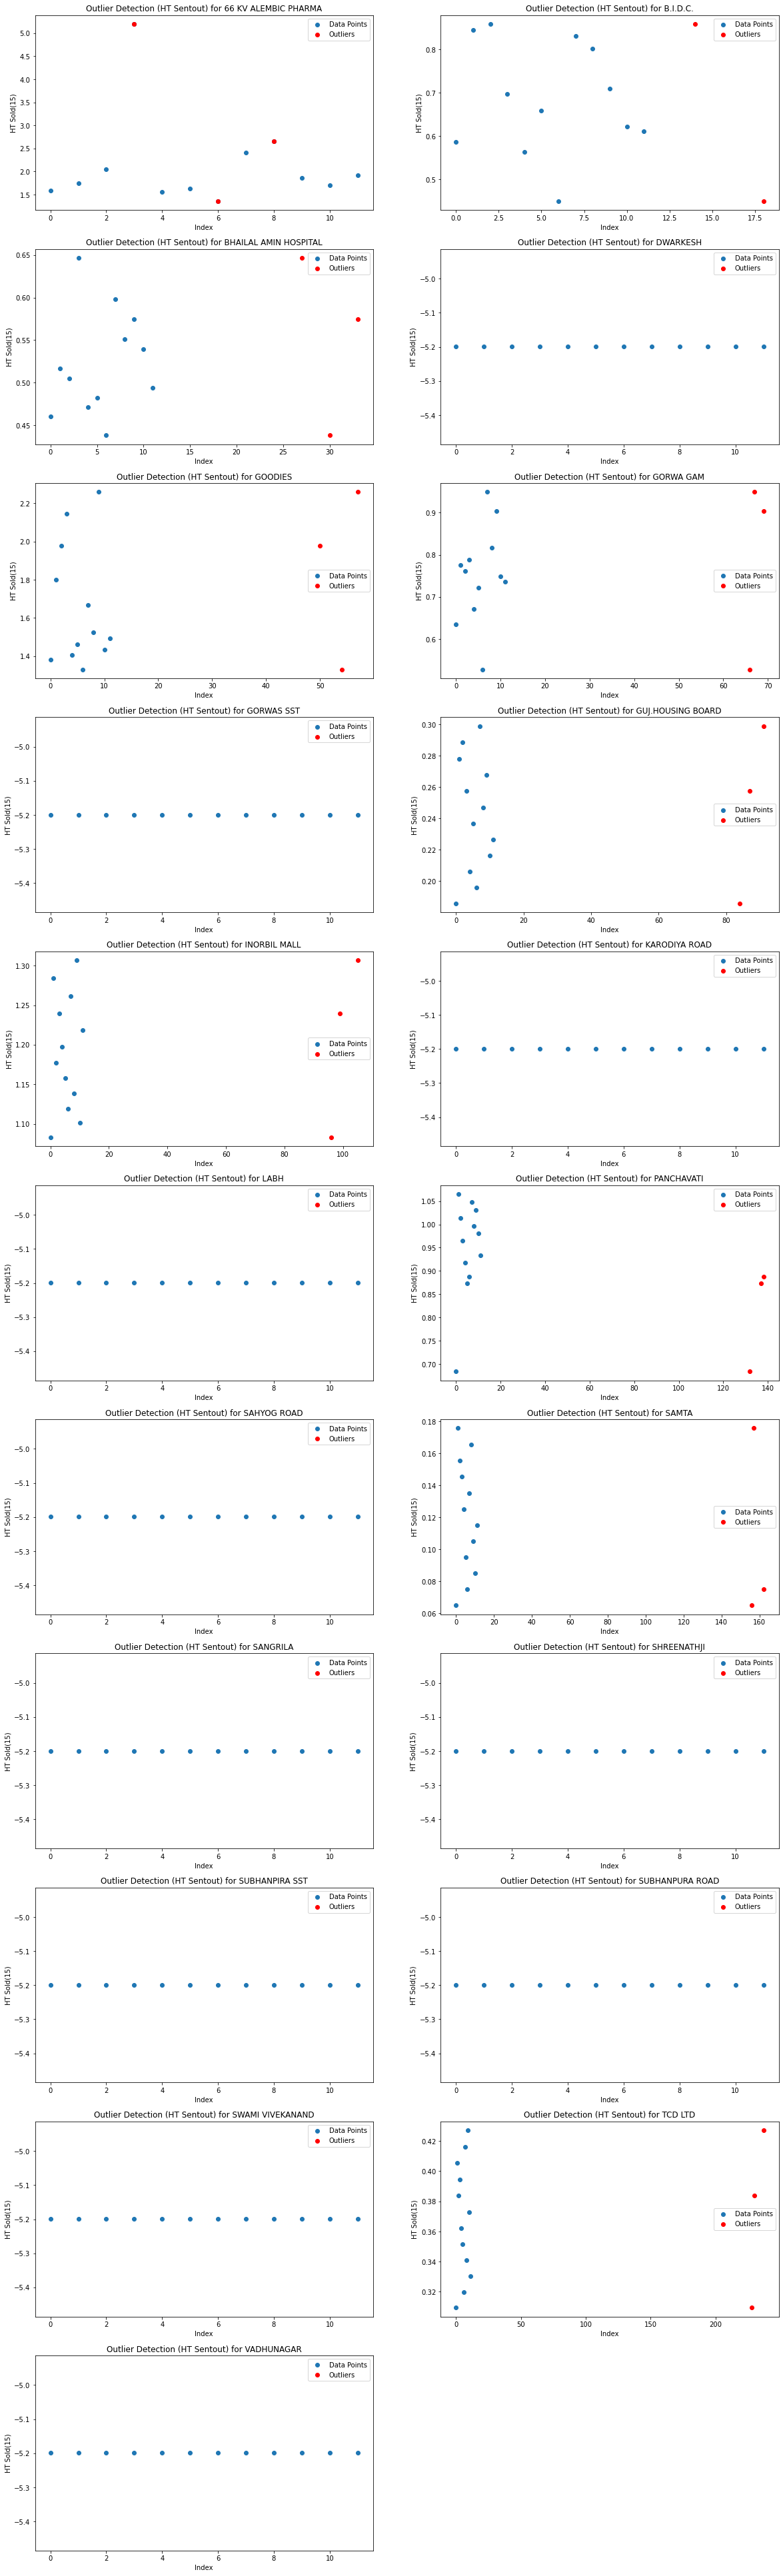

In [28]:
new=pd.DataFrame()
ctr=0
plt.figure(figsize=(20, 70))
for i in feeders:
    ctr+=1
    select_prod = ht.loc[ht['Feeder name'] == i]
    htvalues = select_prod['HT Sold(15)'].values.reshape(-1, 1)
    iso_forest = IsolationForest(n_estimators=7, contamination=0.22, random_state=42)
    outlier_pred = iso_forest.fit_predict(htvalues)
    outliers = select_prod[outlier_pred == -1]
    select_prod.insert(2, 'Outliers', outlier_pred, True)
    new=new.append(select_prod)
    print(i)
    print(outliers[['Feeder name','HT Sold(15)']])
    print()
    plt.subplot(11,2,ctr)
    plt.scatter(range(len(htvalues)), htvalues, label='Data Points')
    plt.scatter(outliers.index, outliers['HT Sold(15)'], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel('HT Sold(15)')
    plt.legend()
    plt.title(f'Outlier Detection (HT Sentout) for {i}')
plt.show()

In [29]:
new.to_csv('gorwa_htsentout_outlier.csv', index=False)
new

Feeder name  HT Sold(15)  Outliers
0    66 KV ALEMBIC PHARMA     1.591248         1
1    66 KV ALEMBIC PHARMA     1.752538         1
2    66 KV ALEMBIC PHARMA     2.055397         1
3    66 KV ALEMBIC PHARMA     5.199338        -1
4    66 KV ALEMBIC PHARMA     1.556783         1
..                    ...          ...       ...
247            VADHUNAGAR    -5.199338         1
248            VADHUNAGAR    -5.199338         1
249            VADHUNAGAR    -5.199338         1
250            VADHUNAGAR    -5.199338         1
251            VADHUNAGAR    -5.199338         1

[252 rows x 3 columns]

### Total Soldout

In [30]:
soldout=dm[['Feeder name','Total Soldout(19=16-18+17)']]
soldout

Feeder name  Total Soldout(19=16-18+17)
0    66 KV ALEMBIC PHARMA               301434.301991
1    66 KV ALEMBIC PHARMA               306173.301406
2    66 KV ALEMBIC PHARMA               318956.493669
3    66 KV ALEMBIC PHARMA               335104.477645
4    66 KV ALEMBIC PHARMA               300837.784756
..                    ...                         ...
247            VADHUNAGAR               204340.317906
248            VADHUNAGAR               194960.139336
249            VADHUNAGAR               196104.874884
250            VADHUNAGAR               185171.851736
251            VADHUNAGAR               185213.866794

[252 rows x 2 columns]

#### Isolation Forest

66 KV ALEMBIC PHARMA
            Feeder name  Total Soldout(19=16-18+17)
2  66 KV ALEMBIC PHARMA               318956.493669
3  66 KV ALEMBIC PHARMA               335104.477645
6  66 KV ALEMBIC PHARMA               276995.309757

B.I.D.C.
   Feeder name  Total Soldout(19=16-18+17)
14    B.I.D.C.               172063.432299
16    B.I.D.C.               150409.655928
18    B.I.D.C.               139623.252118

BHAILAL AMIN HOSPITAL
              Feeder name  Total Soldout(19=16-18+17)
27  BHAILAL AMIN HOSPITAL               141931.652971
30  BHAILAL AMIN HOSPITAL               120137.220893
33  BHAILAL AMIN HOSPITAL               138277.379653

DWARKESH
   Feeder name  Total Soldout(19=16-18+17)
36    DWARKESH               199748.426425
44    DWARKESH               226866.815620
45    DWARKESH               232417.526941

GOODIES
   Feeder name  Total Soldout(19=16-18+17)
48     GOODIES               316215.176684
49     GOODIES               341542.333445
54     GOODIES               2

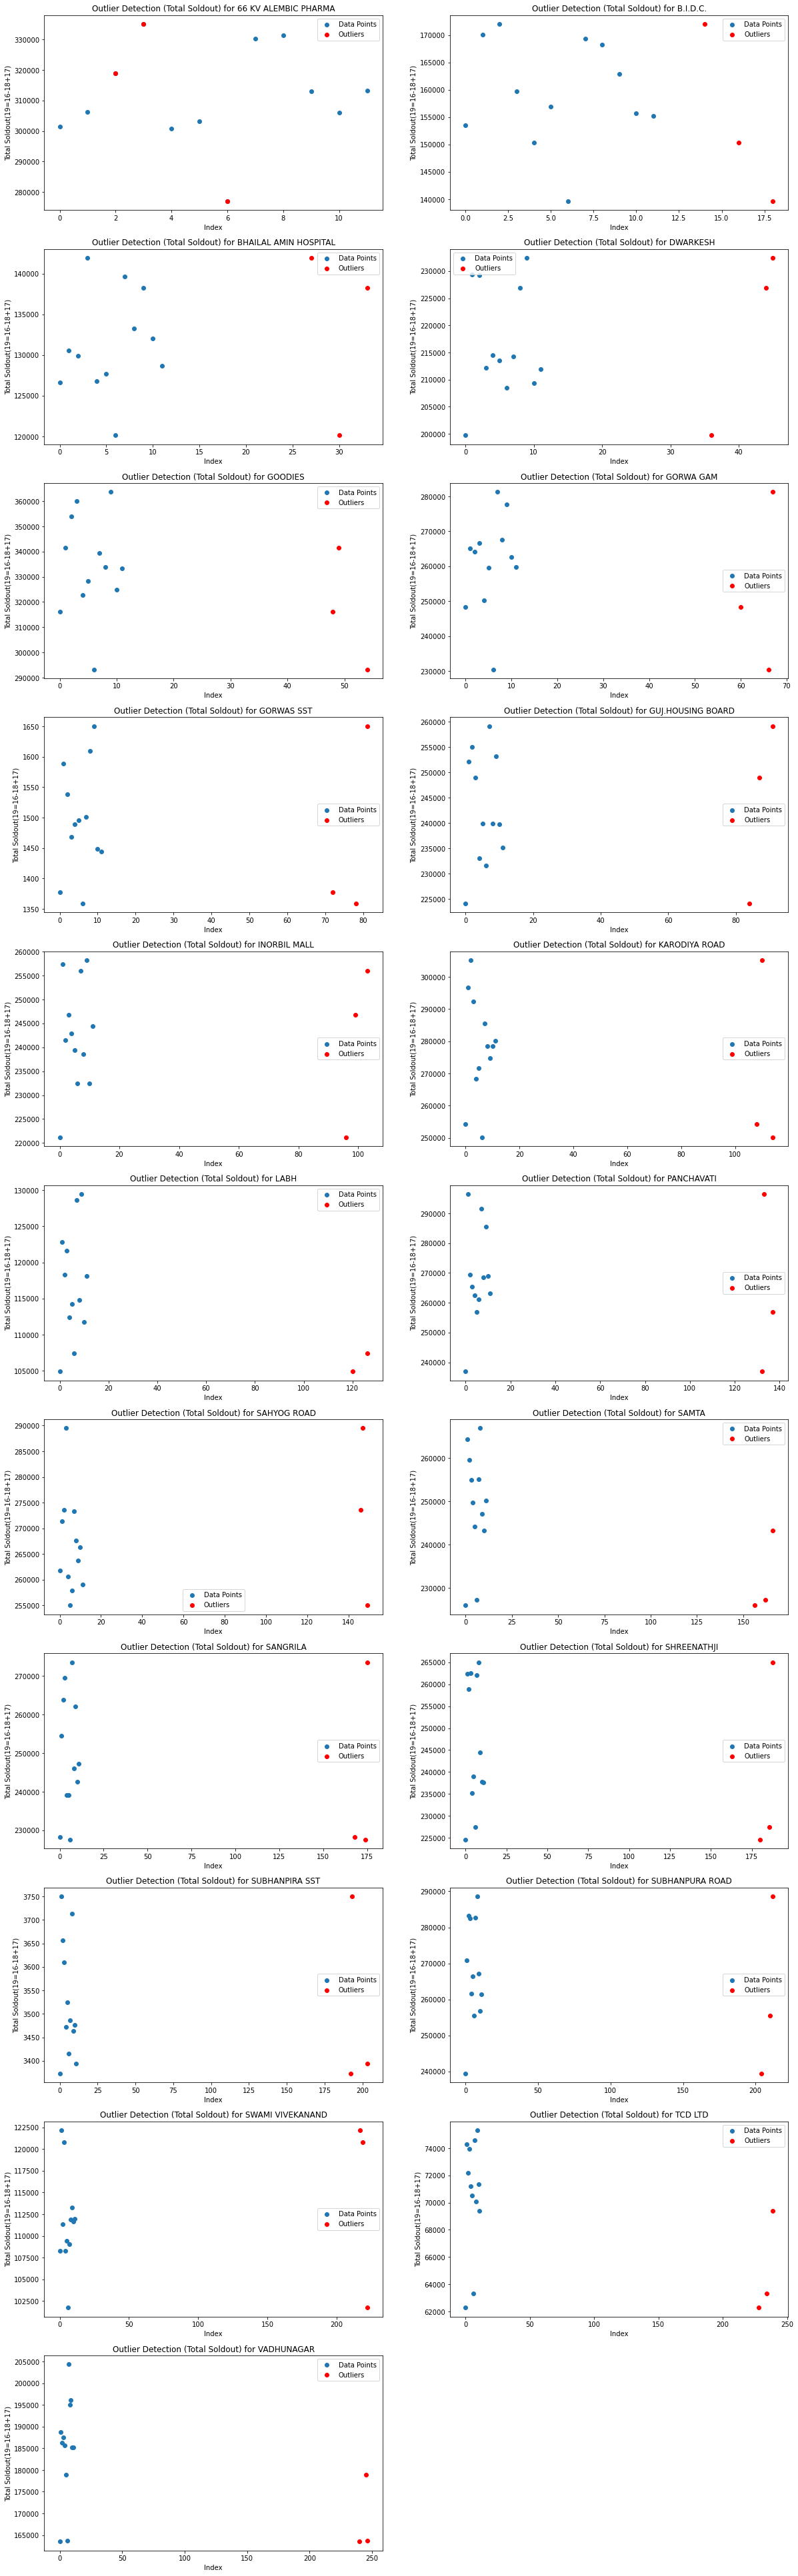

In [31]:
new=pd.DataFrame()
ctr=0
plt.figure(figsize=(20, 70))
for i in feeders:
    ctr+=1
    select_prod = soldout.loc[soldout['Feeder name'] == i]
    soldoutvalues = select_prod['Total Soldout(19=16-18+17)'].values.reshape(-1, 1)
    iso_forest = IsolationForest(n_estimators=7, contamination=0.22, random_state=42)
    outlier_pred = iso_forest.fit_predict(soldoutvalues)
    outliers = select_prod[outlier_pred == -1]
    select_prod.insert(2, 'Outliers', outlier_pred, True)
    new=new.append(select_prod)
    print(i)
    print(outliers[['Feeder name','Total Soldout(19=16-18+17)']])
    print()
    plt.subplot(11,2,ctr)
    plt.scatter(range(len(soldoutvalues)), soldoutvalues, label='Data Points')
    plt.scatter(outliers.index, outliers['Total Soldout(19=16-18+17)'], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel('Total Soldout(19=16-18+17)')
    plt.legend()
    plt.title(f'Outlier Detection (Total Soldout) for {i}')
plt.show()

In [32]:
new.to_csv('gorwa_totalsoldout_outlier.csv', index=False)
new

Feeder name  Total Soldout(19=16-18+17)  Outliers
0    66 KV ALEMBIC PHARMA               301434.301991         1
1    66 KV ALEMBIC PHARMA               306173.301406         1
2    66 KV ALEMBIC PHARMA               318956.493669        -1
3    66 KV ALEMBIC PHARMA               335104.477645        -1
4    66 KV ALEMBIC PHARMA               300837.784756         1
..                    ...                         ...       ...
247            VADHUNAGAR               204340.317906         1
248            VADHUNAGAR               194960.139336         1
249            VADHUNAGAR               196104.874884         1
250            VADHUNAGAR               185171.851736         1
251            VADHUNAGAR               185213.866794         1

[252 rows x 3 columns]

### Unit Loss

In [33]:
unit=dm[['Feeder name','Unite Loss(20=11-19)']]
unit

Feeder name  Unite Loss(20=11-19)
0    66 KV ALEMBIC PHARMA            307.455975
1    66 KV ALEMBIC PHARMA            307.412765
2    66 KV ALEMBIC PHARMA            307.295164
3    66 KV ALEMBIC PHARMA            307.144475
4    66 KV ALEMBIC PHARMA            307.461393
..                    ...                   ...
247            VADHUNAGAR            489.549928
248            VADHUNAGAR            500.278559
249            VADHUNAGAR            508.662431
250            VADHUNAGAR            495.460770
251            VADHUNAGAR            480.758390

[252 rows x 2 columns]

#### Isolation Forest

66 KV ALEMBIC PHARMA
            Feeder name  Unite Loss(20=11-19)
3  66 KV ALEMBIC PHARMA            307.144475
6  66 KV ALEMBIC PHARMA            307.675360
8  66 KV ALEMBIC PHARMA            307.179833

B.I.D.C.
   Feeder name  Unite Loss(20=11-19)
14    B.I.D.C.            366.520113
16    B.I.D.C.            358.401888
18    B.I.D.C.            354.291052

BHAILAL AMIN HOSPITAL
              Feeder name  Unite Loss(20=11-19)
27  BHAILAL AMIN HOSPITAL            286.734159
30  BHAILAL AMIN HOSPITAL            291.393486
31  BHAILAL AMIN HOSPITAL            287.233599

DWARKESH
   Feeder name  Unite Loss(20=11-19)
44    DWARKESH            386.452066
45    DWARKESH            352.302747
47    DWARKESH            487.656749

GOODIES
   Feeder name  Unite Loss(20=11-19)
48     GOODIES            377.719267
54     GOODIES            372.546648
57     GOODIES            388.619085

GORWA GAM
   Feeder name  Unite Loss(20=11-19)
62   GORWA GAM            401.206518
65   GORWA GAM        

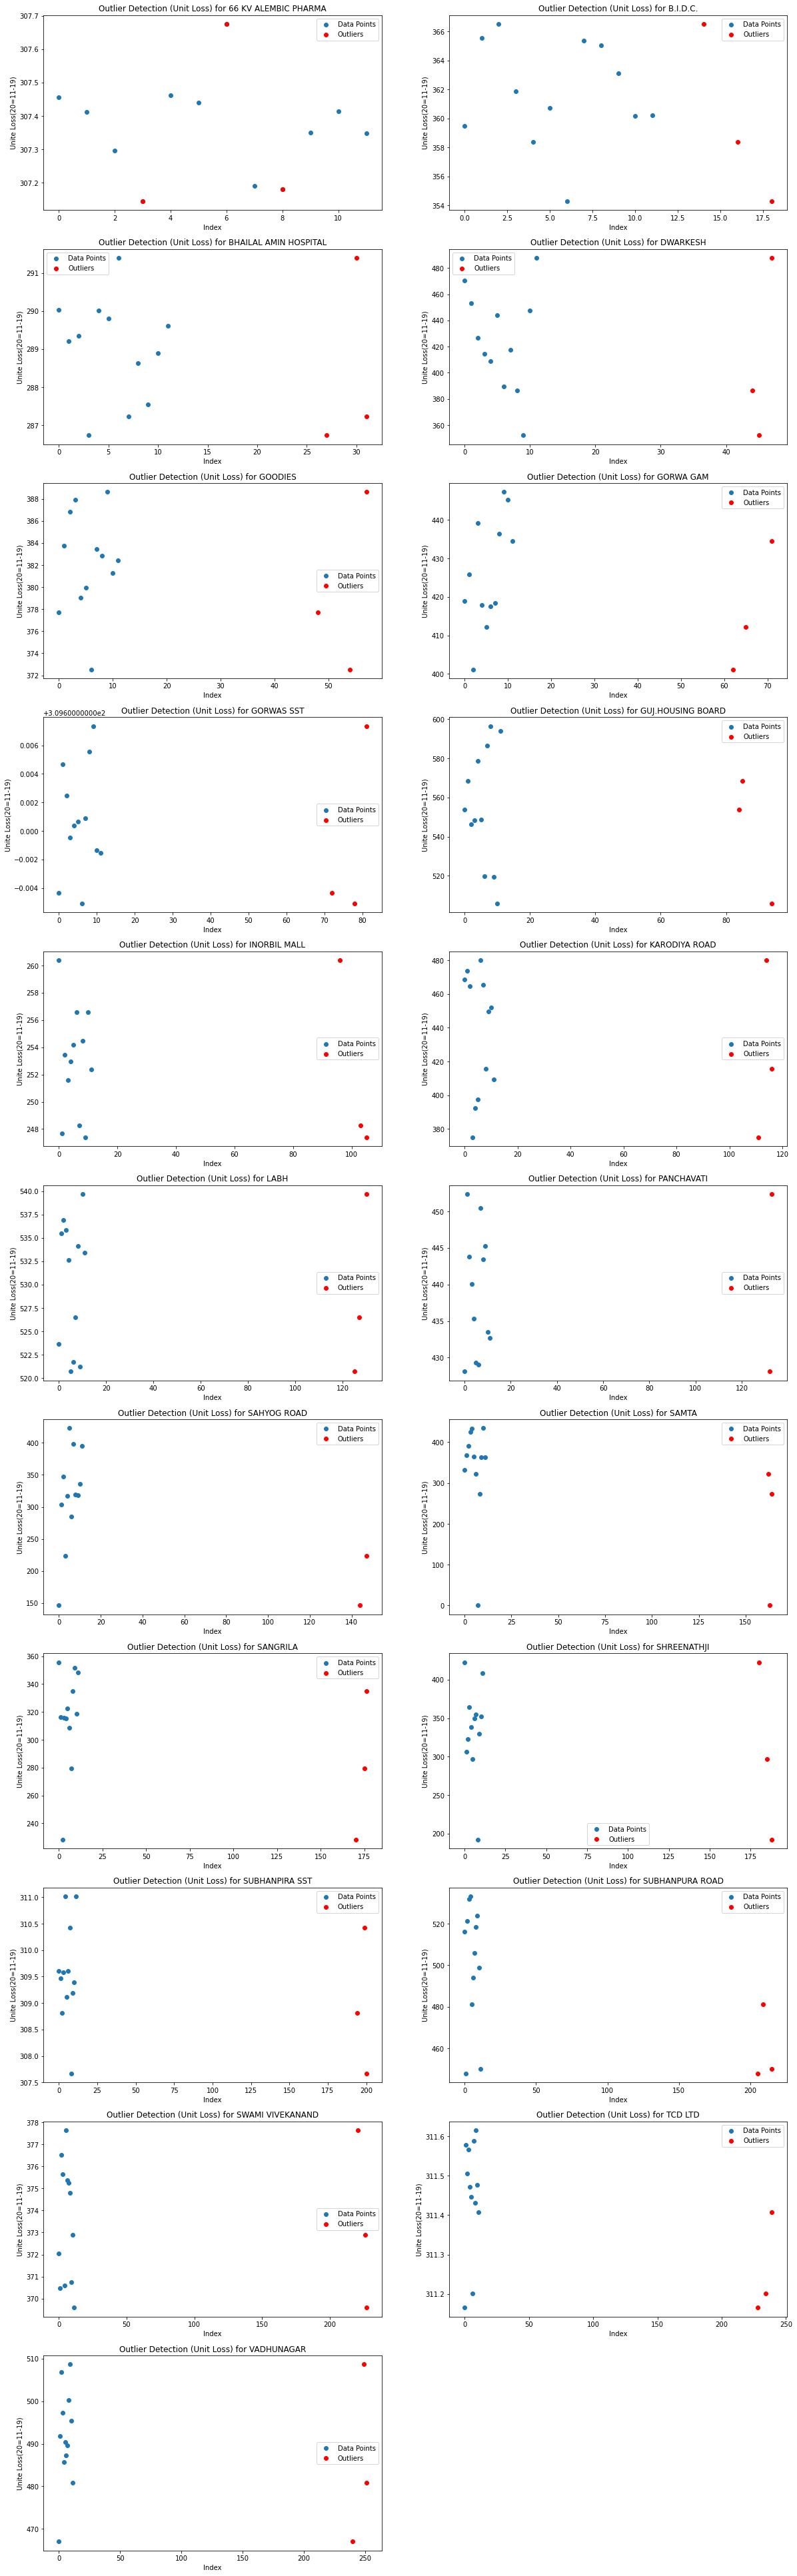

In [34]:
ctr=0
plt.figure(figsize=(20, 70))
for i in feeders:
    ctr+=1
    select_prod = unit.loc[unit['Feeder name'] == i]
    unitvalues = select_prod['Unite Loss(20=11-19)'].values.reshape(-1, 1)
    iso_forest = IsolationForest(n_estimators=7, contamination=0.22, random_state=42)
    outlier_pred = iso_forest.fit_predict(unitvalues)
    outliers = select_prod[outlier_pred == -1]
    select_prod.insert(2, 'Outliers', outlier_pred, True)
    new=new.append(select_prod)
    print(i)
    print(outliers[['Feeder name','Unite Loss(20=11-19)']])
    print()
    plt.subplot(11,2,ctr)
    plt.scatter(range(len(unitvalues)), unitvalues, label='Data Points')
    plt.scatter(outliers.index, outliers['Unite Loss(20=11-19)'], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel('Unite Loss(20=11-19)')
    plt.legend()
    plt.title(f'Outlier Detection (Unit Loss) for {i}')
plt.show()

In [35]:
new.to_csv('gorwa_unitloss_outlier.csv', index=False)
new

Feeder name  Total Soldout(19=16-18+17)  Outliers  \
0    66 KV ALEMBIC PHARMA               301434.301991         1   
1    66 KV ALEMBIC PHARMA               306173.301406         1   
2    66 KV ALEMBIC PHARMA               318956.493669        -1   
3    66 KV ALEMBIC PHARMA               335104.477645        -1   
4    66 KV ALEMBIC PHARMA               300837.784756         1   
..                    ...                         ...       ...   
247            VADHUNAGAR                         NaN         1   
248            VADHUNAGAR                         NaN         1   
249            VADHUNAGAR                         NaN        -1   
250            VADHUNAGAR                         NaN         1   
251            VADHUNAGAR                         NaN        -1   

     Unite Loss(20=11-19)  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
..                    ...  
247            489.549928  
248            500.278559  
249            508.662431  
250            495.460770  
251            480.758390  

[504 rows x 4 columns]

### Sub Station to Feeder Units

In [36]:
ss2feeder=dm[['Feeder name','SS2FEEDER Unites(Kwh)(8)']]
ss2feeder

Feeder name  SS2FEEDER Unites(Kwh)(8)
0    66 KV ALEMBIC PHARMA             148964.812226
1    66 KV ALEMBIC PHARMA             151159.928922
2    66 KV ALEMBIC PHARMA             157070.690599
3    66 KV ALEMBIC PHARMA             164516.301895
4    66 KV ALEMBIC PHARMA             148688.352382
..                    ...                       ...
247            VADHUNAGAR             102500.658418
248            VADHUNAGAR              98227.608761
249            VADHUNAGAR              99284.467202
250            VADHUNAGAR              93631.293256
251            VADHUNAGAR              93305.119614

[252 rows x 2 columns]

#### Isolation forest

66 KV ALEMBIC PHARMA
             Feeder name  SS2FEEDER Unites(Kwh)(8)
0   66 KV ALEMBIC PHARMA             148964.812226
9   66 KV ALEMBIC PHARMA             154352.419657
11  66 KV ALEMBIC PHARMA             154465.893262

B.I.D.C.
   Feeder name  SS2FEEDER Unites(Kwh)(8)
12    B.I.D.C.              80171.782654
21    B.I.D.C.              84765.203253
23    B.I.D.C.              80961.830906

BHAILAL AMIN HOSPITAL
              Feeder name  SS2FEEDER Unites(Kwh)(8)
24  BHAILAL AMIN HOSPITAL              65696.543904
33  BHAILAL AMIN HOSPITAL              71338.029451
35  BHAILAL AMIN HOSPITAL              66677.683872

DWARKESH
   Feeder name  SS2FEEDER Unites(Kwh)(8)
36    DWARKESH              89239.091217
45    DWARKESH             104106.162764
47    DWARKESH              95610.092468

GOODIES
   Feeder name  SS2FEEDER Unites(Kwh)(8)
48     GOODIES             156729.380197
57     GOODIES             178706.885719
59     GOODIES             164662.581017

GORWA GAM
   Feeder na

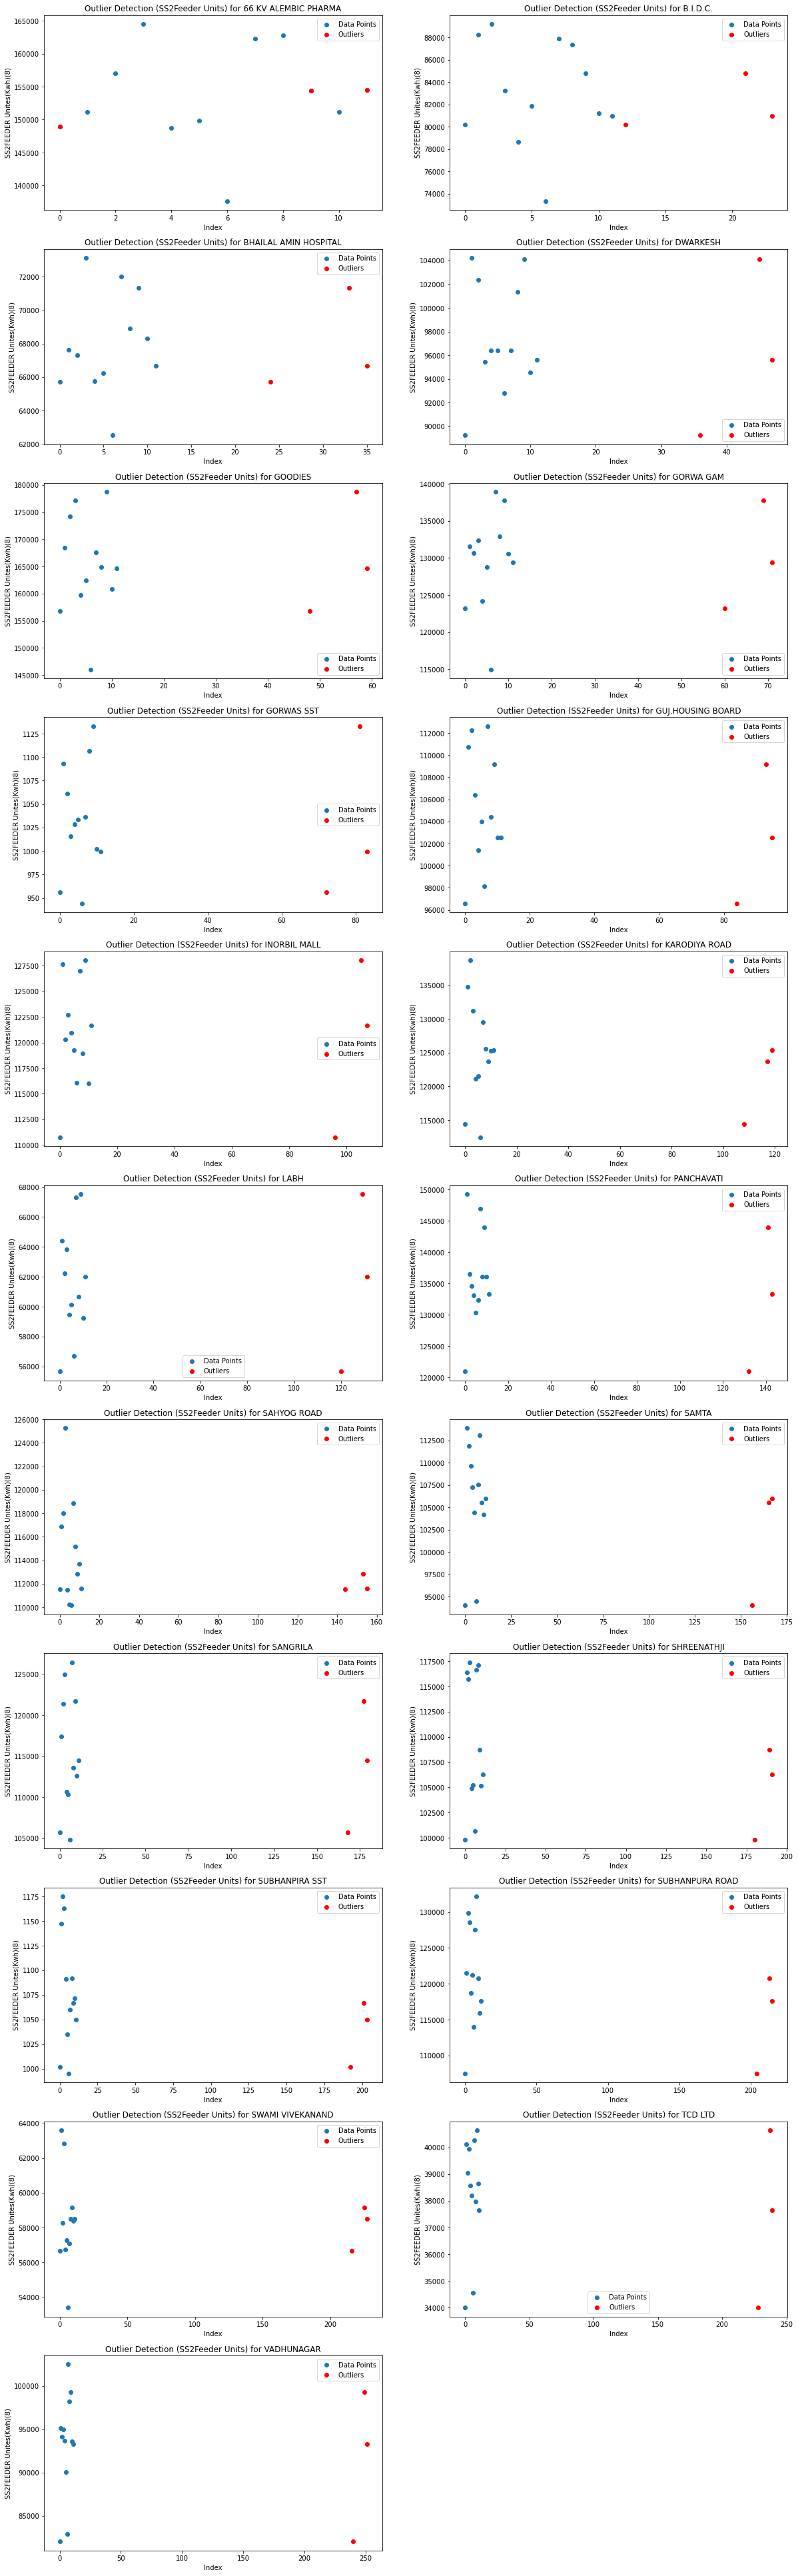

In [37]:
new=pd.DataFrame()
ctr=0
plt.figure(figsize=(20, 70))
for i in feeders:
    ctr+=1
    select_prod = ss2feeder.loc[ss2feeder['Feeder name'] == i]
    ss2feedervalues = select_prod['SS2FEEDER Unites(Kwh)(8)'].values.reshape(-1, 1)
    iso_forest = IsolationForest(n_estimators=7, contamination=0.22, random_state=42)
    outlier_pred = iso_forest.fit_predict(ss2feedervalues)
    outliers = select_prod[outlier_pred == -1]
    outlier_pred = iso_forest.fit_predict(unitvalues)
    outliers = select_prod[outlier_pred == -1]
    select_prod.insert(2, 'Outliers', outlier_pred, True)
    new=new.append(select_prod)
    print(i)
    print(outliers[['Feeder name','SS2FEEDER Unites(Kwh)(8)']])
    print()
    plt.subplot(11,2,ctr)
    plt.scatter(range(len(ss2feedervalues)), ss2feedervalues, label='Data Points')
    plt.scatter(outliers.index, outliers['SS2FEEDER Unites(Kwh)(8)'], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel('SS2FEEDER Unites(Kwh)(8)')
    plt.legend()
    plt.title(f'Outlier Detection (SS2Feeder Units) for {i}')
plt.show()

In [38]:
new.to_csv('gorwa_ss2feeder_outlier.csv', index=False)
new

Feeder name  SS2FEEDER Unites(Kwh)(8)  Outliers
0    66 KV ALEMBIC PHARMA             148964.812226        -1
1    66 KV ALEMBIC PHARMA             151159.928922         1
2    66 KV ALEMBIC PHARMA             157070.690599         1
3    66 KV ALEMBIC PHARMA             164516.301895         1
4    66 KV ALEMBIC PHARMA             148688.352382         1
..                    ...                       ...       ...
247            VADHUNAGAR             102500.658418         1
248            VADHUNAGAR              98227.608761         1
249            VADHUNAGAR              99284.467202        -1
250            VADHUNAGAR              93631.293256         1
251            VADHUNAGAR              93305.119614        -1

[252 rows x 3 columns]

In [39]:
new.to_csv('gorwa_feeder2ss_outlier.csv', index=False)
new

Feeder name  SS2FEEDER Unites(Kwh)(8)  Outliers
0    66 KV ALEMBIC PHARMA             148964.812226        -1
1    66 KV ALEMBIC PHARMA             151159.928922         1
2    66 KV ALEMBIC PHARMA             157070.690599         1
3    66 KV ALEMBIC PHARMA             164516.301895         1
4    66 KV ALEMBIC PHARMA             148688.352382         1
..                    ...                       ...       ...
247            VADHUNAGAR             102500.658418         1
248            VADHUNAGAR              98227.608761         1
249            VADHUNAGAR              99284.467202        -1
250            VADHUNAGAR              93631.293256         1
251            VADHUNAGAR              93305.119614        -1

[252 rows x 3 columns]

### Feeder to Sub Station Units

In [40]:
feeder2ss=dm[['Feeder name','Feeder2SS UNites(Kwh)(9)']]
feeder2ss

Feeder name  Feeder2SS UNites(Kwh)(9)
0    66 KV ALEMBIC PHARMA                      0.00
1    66 KV ALEMBIC PHARMA                      0.00
2    66 KV ALEMBIC PHARMA                      0.00
3    66 KV ALEMBIC PHARMA                      0.00
4    66 KV ALEMBIC PHARMA                      0.00
..                    ...                       ...
247            VADHUNAGAR                    393.26
248            VADHUNAGAR                    393.55
249            VADHUNAGAR                    469.38
250            VADHUNAGAR                    462.29
251            VADHUNAGAR                    447.52

[252 rows x 2 columns]

#### Isolation forest

66 KV ALEMBIC PHARMA
Empty DataFrame
Columns: [Feeder name, Feeder2SS UNites(Kwh)(9)]
Index: []

B.I.D.C.
   Feeder name  Feeder2SS UNites(Kwh)(9)
12    B.I.D.C.                    505.70
14    B.I.D.C.                    452.67
17    B.I.D.C.                    450.21

BHAILAL AMIN HOSPITAL
Empty DataFrame
Columns: [Feeder name, Feeder2SS UNites(Kwh)(9)]
Index: []

DWARKESH
   Feeder name  Feeder2SS UNites(Kwh)(9)
38    DWARKESH                  36218.78
40    DWARKESH                  39392.01

GOODIES
Empty DataFrame
Columns: [Feeder name, Feeder2SS UNites(Kwh)(9)]
Index: []

GORWA GAM
Empty DataFrame
Columns: [Feeder name, Feeder2SS UNites(Kwh)(9)]
Index: []

GORWAS SST
Empty DataFrame
Columns: [Feeder name, Feeder2SS UNites(Kwh)(9)]
Index: []

GUJ.HOUSING BOARD
Empty DataFrame
Columns: [Feeder name, Feeder2SS UNites(Kwh)(9)]
Index: []

INORBIL MALL
      Feeder name  Feeder2SS UNites(Kwh)(9)
100  INORBIL MALL                    111.62
101  INORBIL MALL                    130.73

K

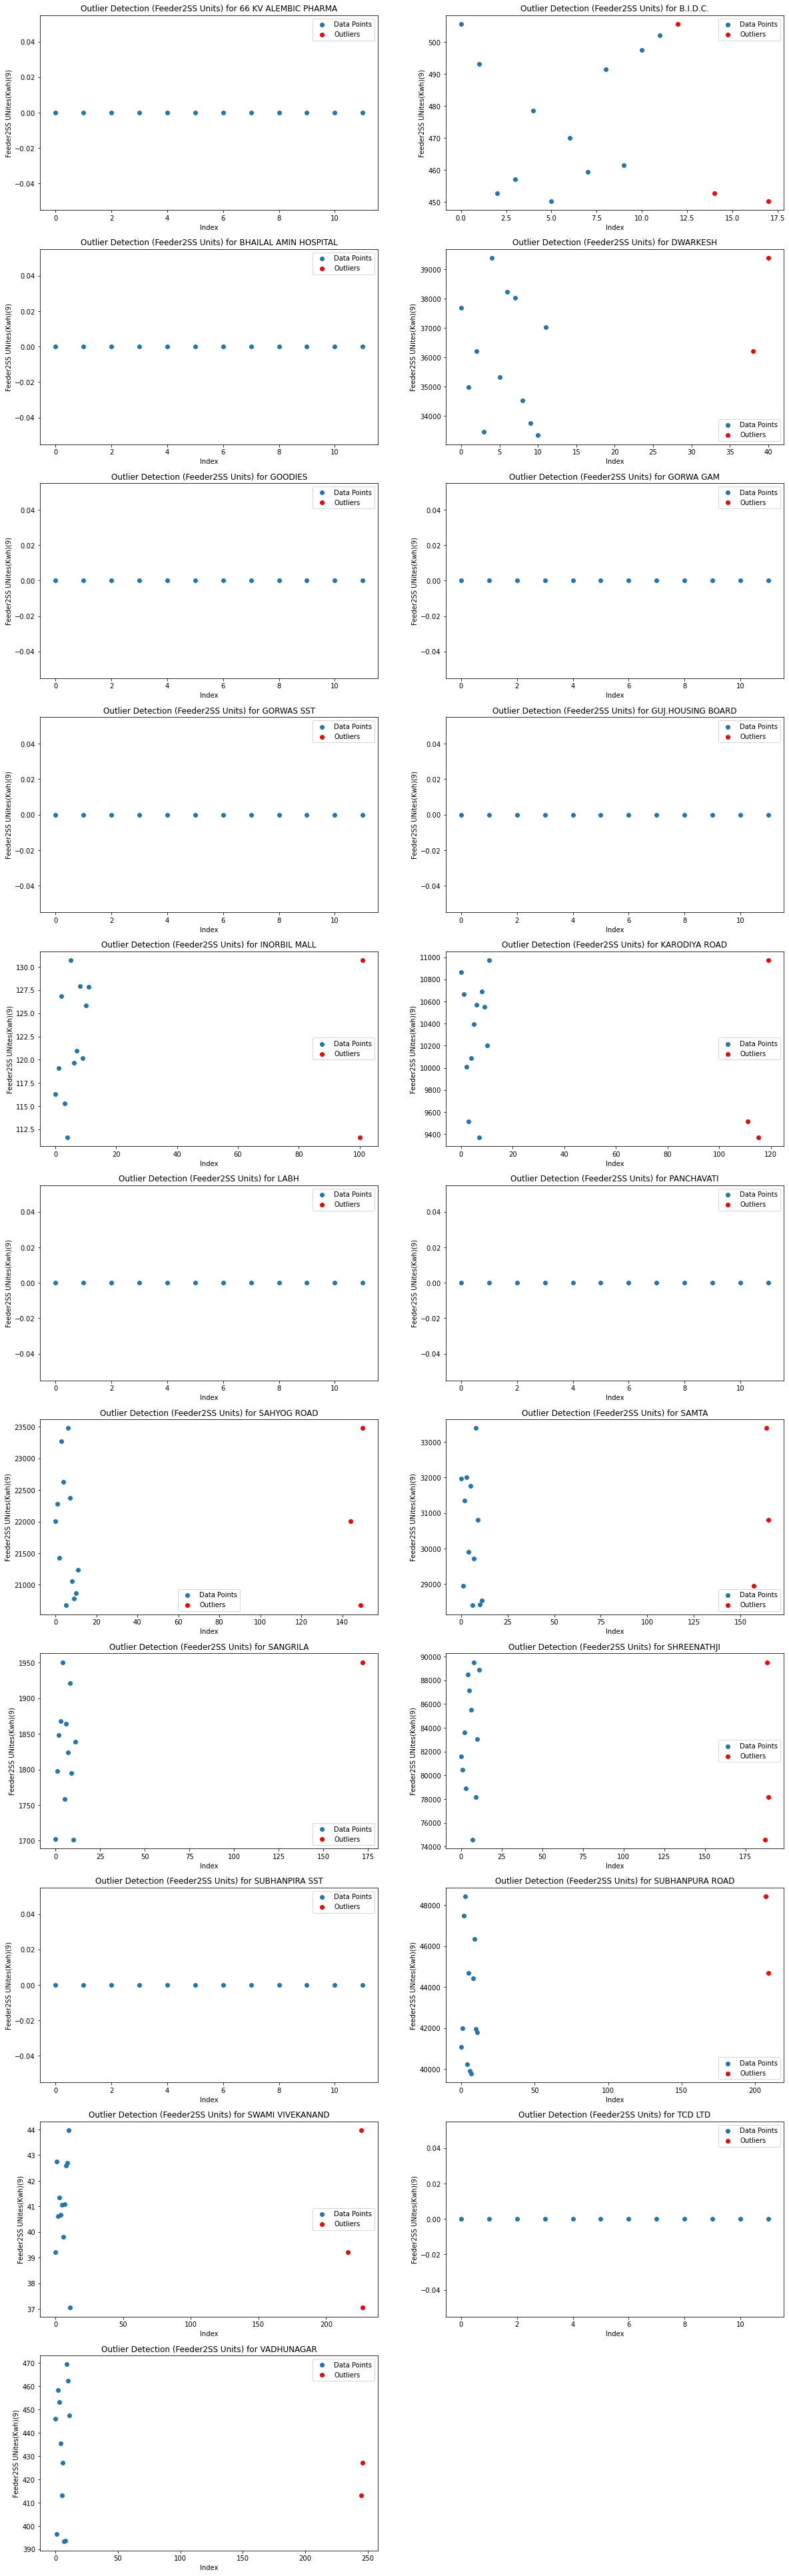

In [41]:
new=pd.DataFrame()
ctr=0
plt.figure(figsize=(20, 70))
for i in feeders:
    ctr+=1
    select_prod = feeder2ss.loc[feeder2ss['Feeder name'] == i]
    feeder2ssvalues = select_prod['Feeder2SS UNites(Kwh)(9)'].values.reshape(-1, 1)
    iso_forest = IsolationForest(n_estimators=7, contamination=0.22, random_state=42)
    outlier_pred = iso_forest.fit_predict(feeder2ssvalues)
    outliers = select_prod[outlier_pred == -1]
    select_prod.insert(2, 'Outliers', outlier_pred, True)
    new=new.append(select_prod)
    print(i)
    print(outliers[['Feeder name','Feeder2SS UNites(Kwh)(9)']])
    print()
    plt.subplot(11,2,ctr)
    plt.scatter(range(len(feeder2ssvalues)), feeder2ssvalues, label='Data Points')
    plt.scatter(outliers.index, outliers['Feeder2SS UNites(Kwh)(9)'], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel('Feeder2SS UNites(Kwh)(9)')
    plt.legend()
    plt.title(f'Outlier Detection (Feeder2SS Units) for {i}')
plt.show()

In [42]:
new.to_csv('gorwa_feeder2ss_outlier.csv', index=False)
new

Feeder name  Feeder2SS UNites(Kwh)(9)  Outliers
0    66 KV ALEMBIC PHARMA                      0.00         1
1    66 KV ALEMBIC PHARMA                      0.00         1
2    66 KV ALEMBIC PHARMA                      0.00         1
3    66 KV ALEMBIC PHARMA                      0.00         1
4    66 KV ALEMBIC PHARMA                      0.00         1
..                    ...                       ...       ...
247            VADHUNAGAR                    393.26         1
248            VADHUNAGAR                    393.55         1
249            VADHUNAGAR                    469.38         1
250            VADHUNAGAR                    462.29         1
251            VADHUNAGAR                    447.52         1

[252 rows x 3 columns]

### Consumer Export(10)

In [43]:
exp=dm[['Feeder name','Consumer Export(10)']]
exp

Feeder name  Consumer Export(10)
0    66 KV ALEMBIC PHARMA             0.000000
1    66 KV ALEMBIC PHARMA             0.000000
2    66 KV ALEMBIC PHARMA             0.000000
3    66 KV ALEMBIC PHARMA             0.000000
4    66 KV ALEMBIC PHARMA             0.000000
..                    ...                  ...
247            VADHUNAGAR            12.956409
248            VADHUNAGAR            12.985810
249            VADHUNAGAR            12.947914
250            VADHUNAGAR            12.940546
251            VADHUNAGAR            12.911241

[252 rows x 2 columns]

#### Isolation Forest

66 KV ALEMBIC PHARMA
Empty DataFrame
Columns: [Feeder name, Consumer Export(10)]
Index: []

B.I.D.C.
   Feeder name  Consumer Export(10)
13    B.I.D.C.             7.976695
20    B.I.D.C.             8.068469
22    B.I.D.C.             7.983242

BHAILAL AMIN HOSPITAL
Empty DataFrame
Columns: [Feeder name, Consumer Export(10)]
Index: []

DWARKESH
   Feeder name  Consumer Export(10)
36    DWARKESH            14.034142
45    DWARKESH            13.915026
47    DWARKESH            14.051146

GOODIES
   Feeder name  Consumer Export(10)
53     GOODIES            10.014746
56     GOODIES            10.122517
57     GOODIES            10.047423

GORWA GAM
   Feeder name  Consumer Export(10)
62   GORWA GAM            12.348370
65   GORWA GAM            12.353176
71   GORWA GAM            12.368112

GORWAS SST
Empty DataFrame
Columns: [Feeder name, Consumer Export(10)]
Index: []

GUJ.HOUSING BOARD
          Feeder name  Consumer Export(10)
86  GUJ.HOUSING BOARD            14.376896
91  GUJ.HOUSI

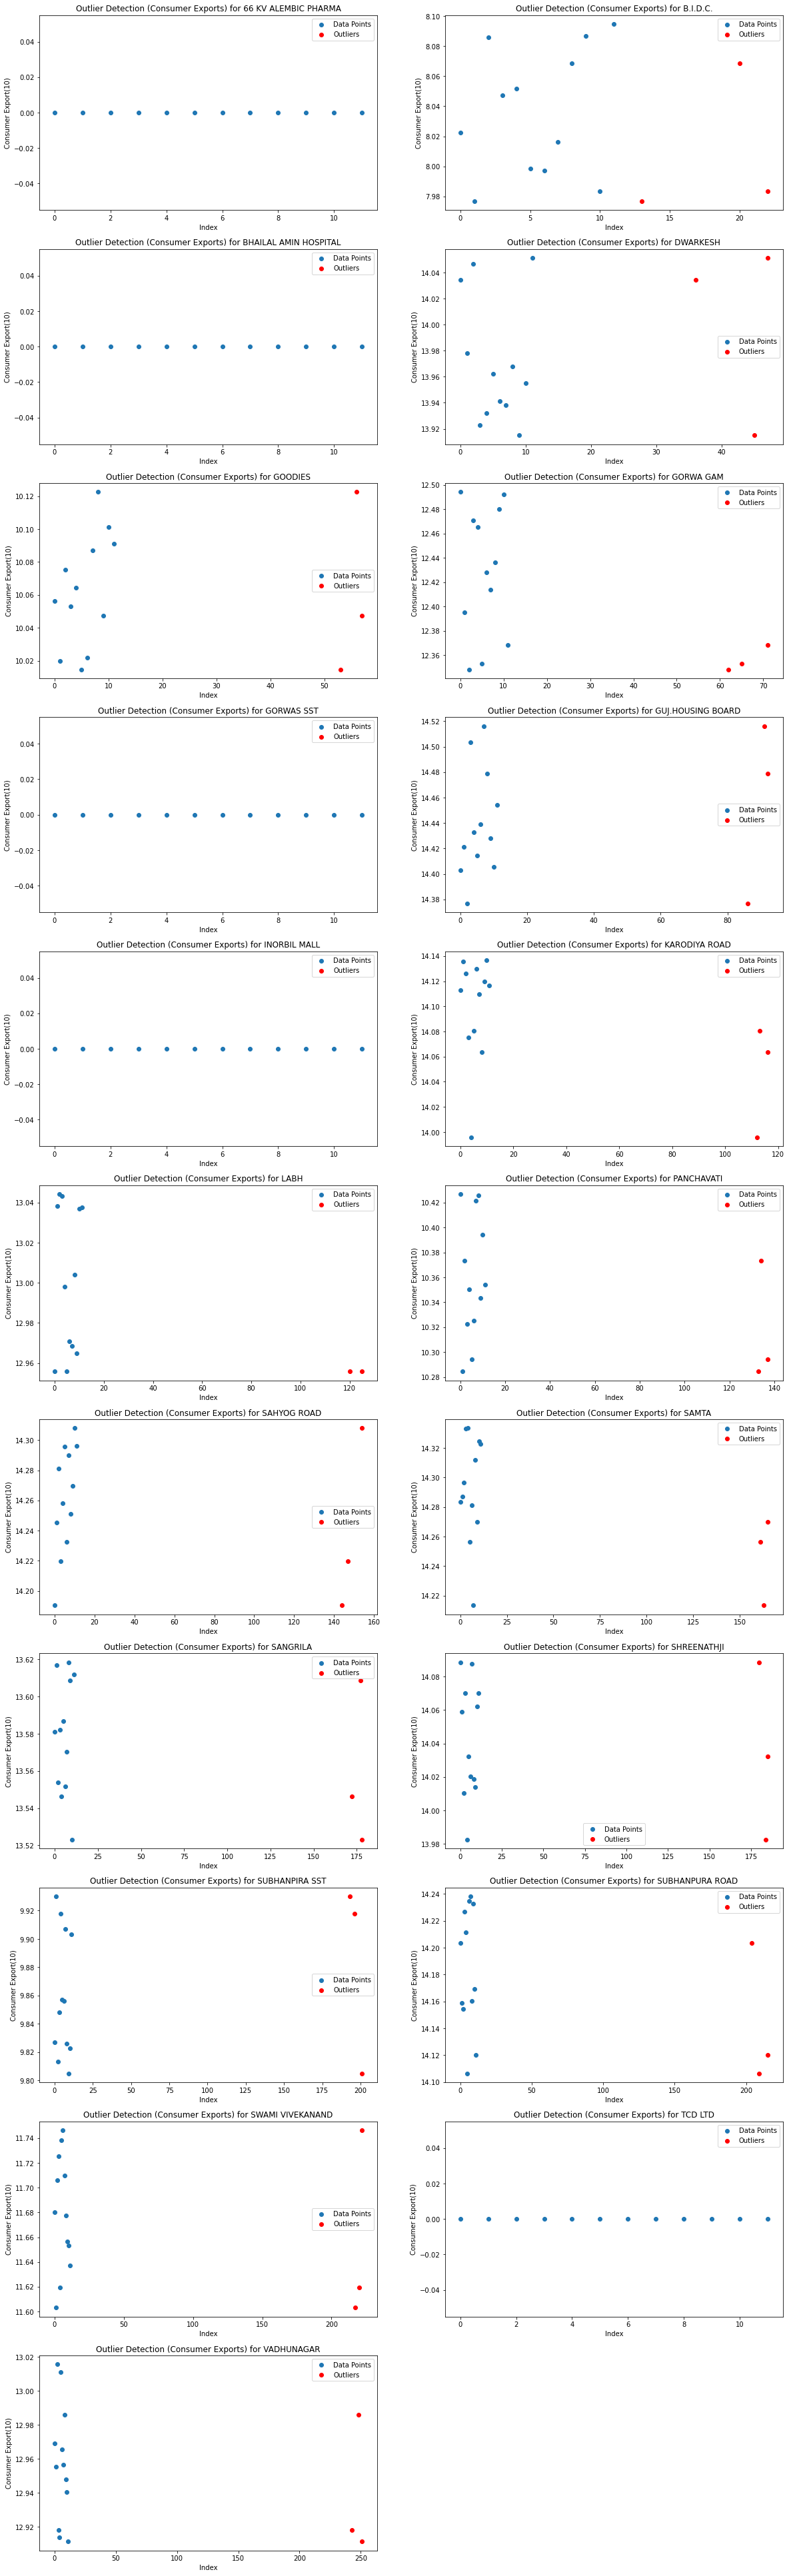

In [44]:
new=pd.DataFrame()
ctr=0
plt.figure(figsize=(20, 70))
for i in feeders:
    ctr+=1
    select_prod = exp.loc[exp['Feeder name'] == i]
    expvalues = select_prod['Consumer Export(10)'].values.reshape(-1, 1)
    iso_forest = IsolationForest(n_estimators=7, contamination=0.22, random_state=42)
    outlier_pred = iso_forest.fit_predict(expvalues)
    outliers = select_prod[outlier_pred == -1]
    select_prod.insert(2, 'Outliers', outlier_pred, True)
    new=new.append(select_prod)
    print(i)
    print(outliers[['Feeder name','Consumer Export(10)']])
    print()
    plt.subplot(11,2,ctr)
    plt.scatter(range(len(expvalues)), expvalues, label='Data Points')
    plt.scatter(outliers.index, outliers['Consumer Export(10)'], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel('Consumer Export(10)')
    plt.legend()
    plt.title(f'Outlier Detection (Consumer Exports) for {i}')
plt.show()

In [45]:
new.to_csv('gorwa_export_outlier.csv', index=False)
new

Feeder name  Consumer Export(10)  Outliers
0    66 KV ALEMBIC PHARMA             0.000000         1
1    66 KV ALEMBIC PHARMA             0.000000         1
2    66 KV ALEMBIC PHARMA             0.000000         1
3    66 KV ALEMBIC PHARMA             0.000000         1
4    66 KV ALEMBIC PHARMA             0.000000         1
..                    ...                  ...       ...
247            VADHUNAGAR            12.956409         1
248            VADHUNAGAR            12.985810        -1
249            VADHUNAGAR            12.947914         1
250            VADHUNAGAR            12.940546         1
251            VADHUNAGAR            12.911241        -1

[252 rows x 3 columns]

### Total Billed

In [46]:
bill=dm[['Feeder name','Total BIlled UNites(16=12+13+14+15)']]
bill

Feeder name  Total BIlled UNites(16=12+13+14+15)
0    66 KV ALEMBIC PHARMA                        170932.960035
1    66 KV ALEMBIC PHARMA                        173484.703636
2    66 KV ALEMBIC PHARMA                        180358.120587
3    66 KV ALEMBIC PHARMA                        189021.121910
4    66 KV ALEMBIC PHARMA                        170611.619889
..                    ...                                  ...
247            VADHUNAGAR                        112439.964274
248            VADHUNAGAR                        107693.077300
249            VADHUNAGAR                        108866.885489
250            VADHUNAGAR                        102590.070967
251            VADHUNAGAR                        102228.061921

[252 rows x 2 columns]

#### Isolation Forest

66 KV ALEMBIC PHARMA
            Feeder name  Total BIlled UNites(16=12+13+14+15)
2  66 KV ALEMBIC PHARMA                        180358.120587
3  66 KV ALEMBIC PHARMA                        189021.121910
6  66 KV ALEMBIC PHARMA                        157740.960081

B.I.D.C.
   Feeder name  Total BIlled UNites(16=12+13+14+15)
14    B.I.D.C.                        100339.698898
16    B.I.D.C.                         88303.685506
18    B.I.D.C.                         82275.439823

BHAILAL AMIN HOSPITAL
              Feeder name  Total BIlled UNites(16=12+13+14+15)
27  BHAILAL AMIN HOSPITAL                         83578.303681
30  BHAILAL AMIN HOSPITAL                         71337.424075
33  BHAILAL AMIN HOSPITAL                         81532.864215

DWARKESH
   Feeder name  Total BIlled UNites(16=12+13+14+15)
36    DWARKESH                        102474.029705
42    DWARKESH                        106599.466525
44    DWARKESH                        116583.244965

GOODIES
   Feeder name 

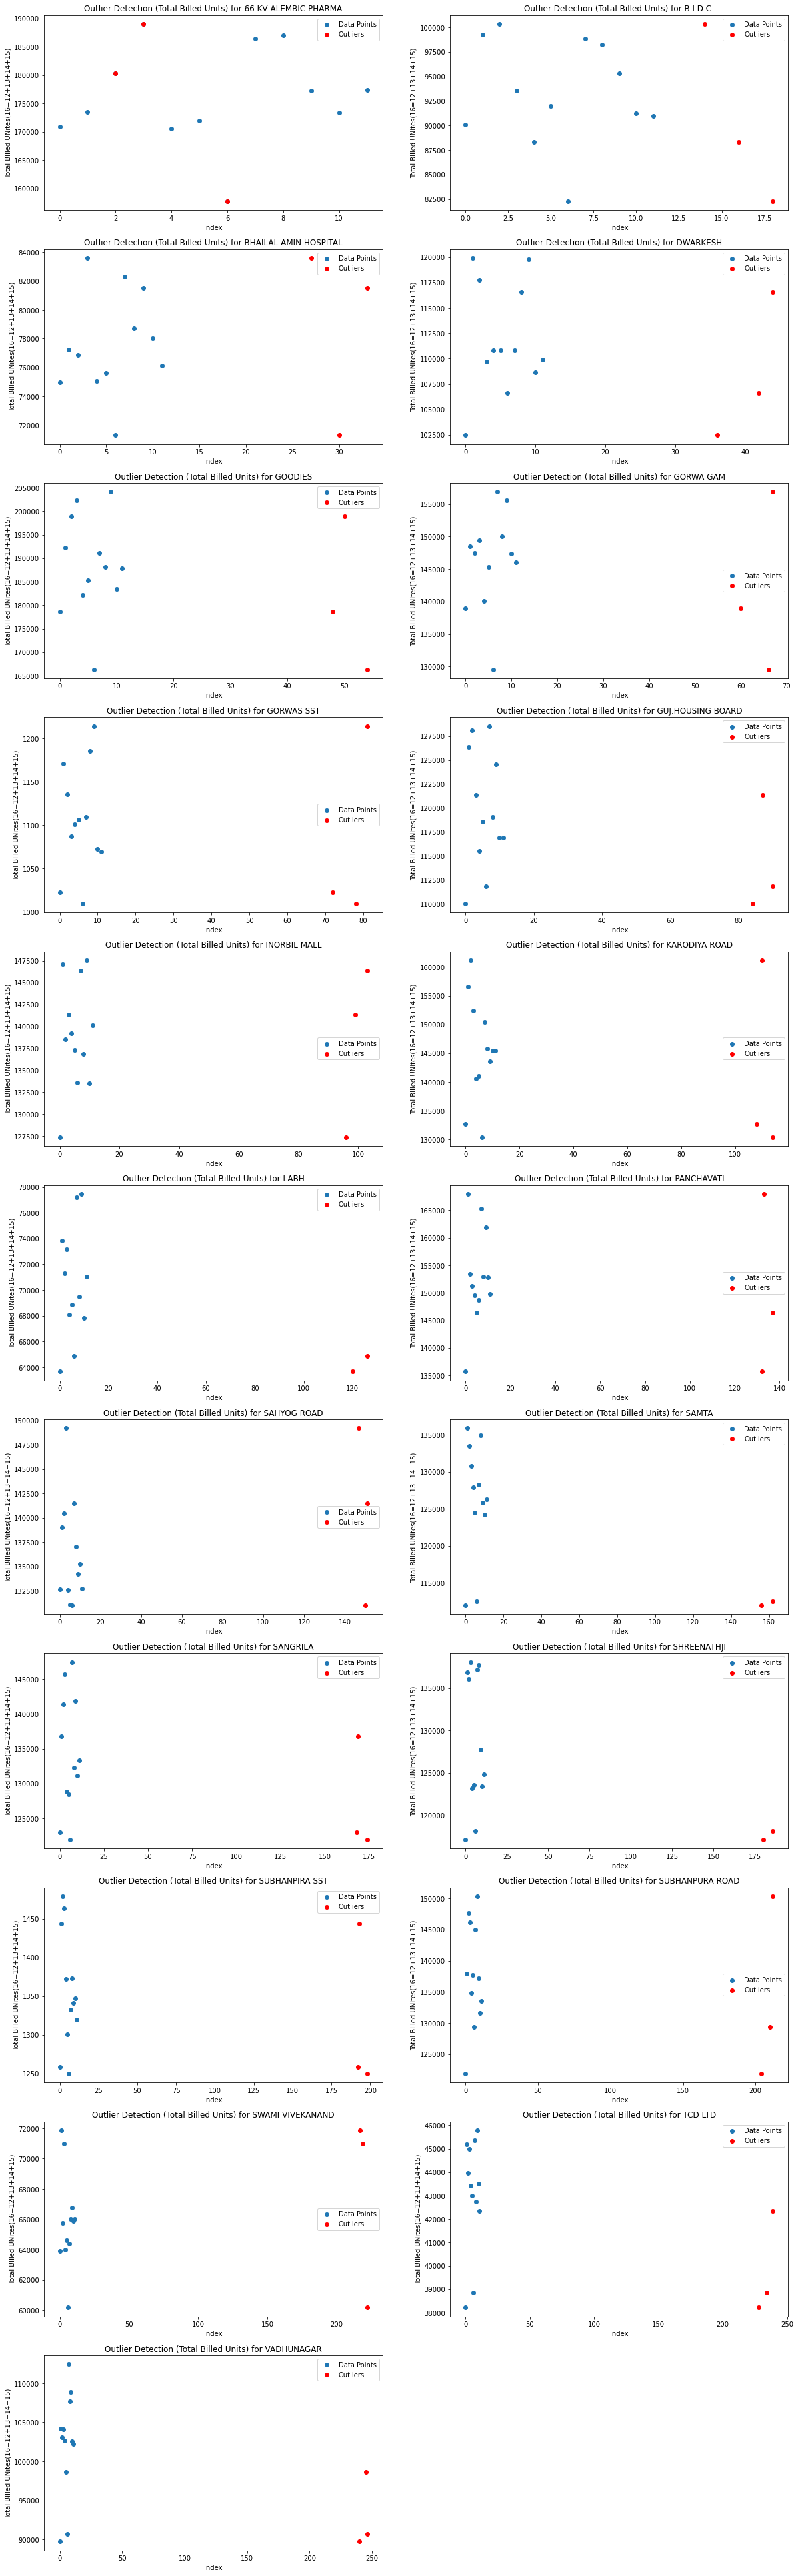

In [47]:
new=pd.DataFrame()
ctr=0
plt.figure(figsize=(20, 70))
for i in feeders:
    ctr+=1
    select_prod = bill.loc[bill['Feeder name'] == i]
    billvalues = select_prod['Total BIlled UNites(16=12+13+14+15)'].values.reshape(-1, 1)
    iso_forest = IsolationForest(n_estimators=7, contamination=0.22, random_state=42)
    outlier_pred = iso_forest.fit_predict(billvalues)
    outliers = select_prod[outlier_pred == -1]
    select_prod.insert(2, 'Outliers', outlier_pred, True)
    new=new.append(select_prod)
    print(i)
    print(outliers[['Feeder name','Total BIlled UNites(16=12+13+14+15)']])
    print()
    plt.subplot(11,2,ctr)
    plt.scatter(range(len(billvalues)), billvalues, label='Data Points')
    plt.scatter(outliers.index, outliers['Total BIlled UNites(16=12+13+14+15)'], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel('Total BIlled UNites(16=12+13+14+15)')
    plt.legend()
    plt.title(f'Outlier Detection (Total Billed Units) for {i}')
plt.show()

In [48]:
new.to_csv('gorwa_billed_outlier.csv', index=False)
new

Feeder name  Total BIlled UNites(16=12+13+14+15)  Outliers
0    66 KV ALEMBIC PHARMA                        170932.960035         1
1    66 KV ALEMBIC PHARMA                        173484.703636         1
2    66 KV ALEMBIC PHARMA                        180358.120587        -1
3    66 KV ALEMBIC PHARMA                        189021.121910        -1
4    66 KV ALEMBIC PHARMA                        170611.619889         1
..                    ...                                  ...       ...
247            VADHUNAGAR                        112439.964274         1
248            VADHUNAGAR                        107693.077300         1
249            VADHUNAGAR                        108866.885489         1
250            VADHUNAGAR                        102590.070967         1
251            VADHUNAGAR                        102228.061921         1

[252 rows x 3 columns]

### Consumer Import

In [49]:
imp=dm[['Feeder name','Consumer Import(17)']]
imp

Feeder name  Consumer Import(17)
0    66 KV ALEMBIC PHARMA             0.000000
1    66 KV ALEMBIC PHARMA             0.000000
2    66 KV ALEMBIC PHARMA             0.000000
3    66 KV ALEMBIC PHARMA             0.000000
4    66 KV ALEMBIC PHARMA             0.000000
..                    ...                  ...
247            VADHUNAGAR            40.338465
248            VADHUNAGAR            39.965260
249            VADHUNAGAR            39.363683
250            VADHUNAGAR            39.432687
251            VADHUNAGAR            39.892414

[252 rows x 2 columns]

#### Isolation Forest

66 KV ALEMBIC PHARMA
Empty DataFrame
Columns: [Feeder name, Consumer Import(17)]
Index: []

B.I.D.C.
   Feeder name  Consumer Import(17)
16    B.I.D.C.            10.666452
18    B.I.D.C.            10.848495
19    B.I.D.C.            10.861895

BHAILAL AMIN HOSPITAL
Empty DataFrame
Columns: [Feeder name, Consumer Import(17)]
Index: []

DWARKESH
   Feeder name  Consumer Import(17)
42    DWARKESH            46.054881
46    DWARKESH            45.334922
47    DWARKESH            45.372138

GOODIES
   Feeder name  Consumer Import(17)
49     GOODIES            22.583042
52     GOODIES            22.857039
53     GOODIES            22.935468

GORWA GAM
   Feeder name  Consumer Import(17)
62   GORWA GAM            40.426877
64   GORWA GAM            40.159199
65   GORWA GAM            39.887470

GORWAS SST
Empty DataFrame
Columns: [Feeder name, Consumer Import(17)]
Index: []

GUJ.HOUSING BOARD
          Feeder name  Consumer Import(17)
87  GUJ.HOUSING BOARD            50.109205
91  GUJ.HOUSI

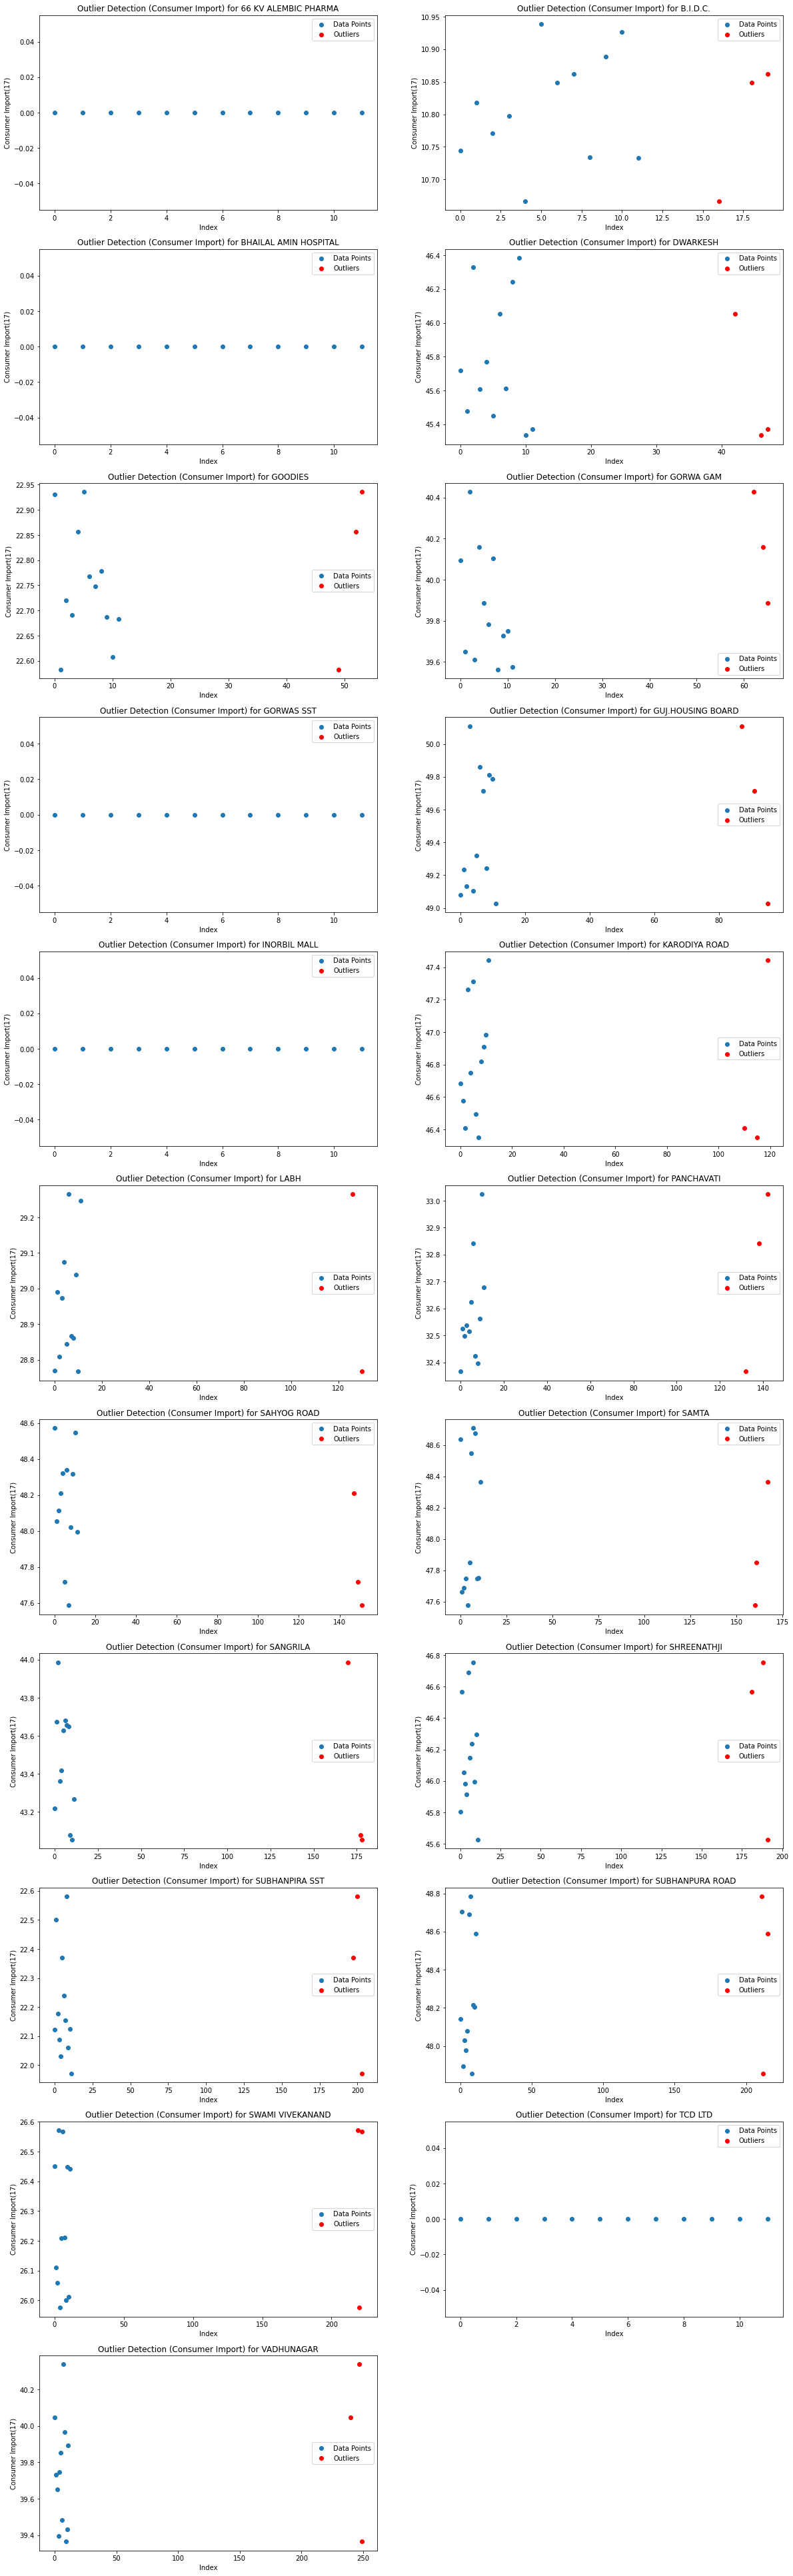

In [50]:
new=pd.DataFrame()
ctr=0
plt.figure(figsize=(20, 70))
for i in feeders:
    ctr+=1
    select_prod = imp.loc[imp['Feeder name'] == i]
    impvalues = select_prod['Consumer Import(17)'].values.reshape(-1, 1)
    iso_forest = IsolationForest(n_estimators=7, contamination=0.22, random_state=42)
    outlier_pred = iso_forest.fit_predict(impvalues)
    outliers = select_prod[outlier_pred == -1]
    select_prod.insert(2, 'Outliers', outlier_pred, True)
    new=new.append(select_prod)
    print(i)
    print(outliers[['Feeder name','Consumer Import(17)']])
    print()
    plt.subplot(11,2,ctr)
    plt.scatter(range(len(impvalues)), impvalues, label='Data Points')
    plt.scatter(outliers.index, outliers['Consumer Import(17)'], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel('Consumer Import(17)')
    plt.legend()
    plt.title(f'Outlier Detection (Consumer Import) for {i}')
plt.show()

In [51]:
new.to_csv('gorwa_import_outlier.csv', index=False)
new

Feeder name  Consumer Import(17)  Outliers
0    66 KV ALEMBIC PHARMA             0.000000         1
1    66 KV ALEMBIC PHARMA             0.000000         1
2    66 KV ALEMBIC PHARMA             0.000000         1
3    66 KV ALEMBIC PHARMA             0.000000         1
4    66 KV ALEMBIC PHARMA             0.000000         1
..                    ...                  ...       ...
247            VADHUNAGAR            40.338465        -1
248            VADHUNAGAR            39.965260         1
249            VADHUNAGAR            39.363683        -1
250            VADHUNAGAR            39.432687         1
251            VADHUNAGAR            39.892414         1

[252 rows x 3 columns]

### Net Assessed(Import) 

In [52]:
net=dm[['Feeder name','Net Assessed(Import)(18)']]
net

Feeder name  Net Assessed(Import)(18)
0    66 KV ALEMBIC PHARMA                  0.000000
1    66 KV ALEMBIC PHARMA                  0.000000
2    66 KV ALEMBIC PHARMA                  0.000000
3    66 KV ALEMBIC PHARMA                  0.000000
4    66 KV ALEMBIC PHARMA                  0.000000
..                    ...                       ...
247            VADHUNAGAR                 34.200574
248            VADHUNAGAR                 34.486619
249            VADHUNAGAR                 34.192968
250            VADHUNAGAR                 33.946102
251            VADHUNAGAR                 34.269990

[252 rows x 2 columns]

#### Isolation Forest

66 KV ALEMBIC PHARMA
Empty DataFrame
Columns: [Feeder name, Net Assessed(Import)(18)]
Index: []

B.I.D.C.
Empty DataFrame
Columns: [Feeder name, Net Assessed(Import)(18)]
Index: []

BHAILAL AMIN HOSPITAL
Empty DataFrame
Columns: [Feeder name, Net Assessed(Import)(18)]
Index: []

DWARKESH
   Feeder name  Net Assessed(Import)(18)
38    DWARKESH                 36.612083
45    DWARKESH                 37.452592
47    DWARKESH                 36.563740

GOODIES
   Feeder name  Net Assessed(Import)(18)
52     GOODIES                 18.922852
55     GOODIES                 18.940000

GORWA GAM
   Feeder name  Net Assessed(Import)(18)
61   GORWA GAM                 38.686146
67   GORWA GAM                 38.659965
70   GORWA GAM                 39.363968

GORWAS SST
Empty DataFrame
Columns: [Feeder name, Net Assessed(Import)(18)]
Index: []

GUJ.HOUSING BOARD
          Feeder name  Net Assessed(Import)(18)
85  GUJ.HOUSING BOARD                 41.676056
90  GUJ.HOUSING BOARD                 

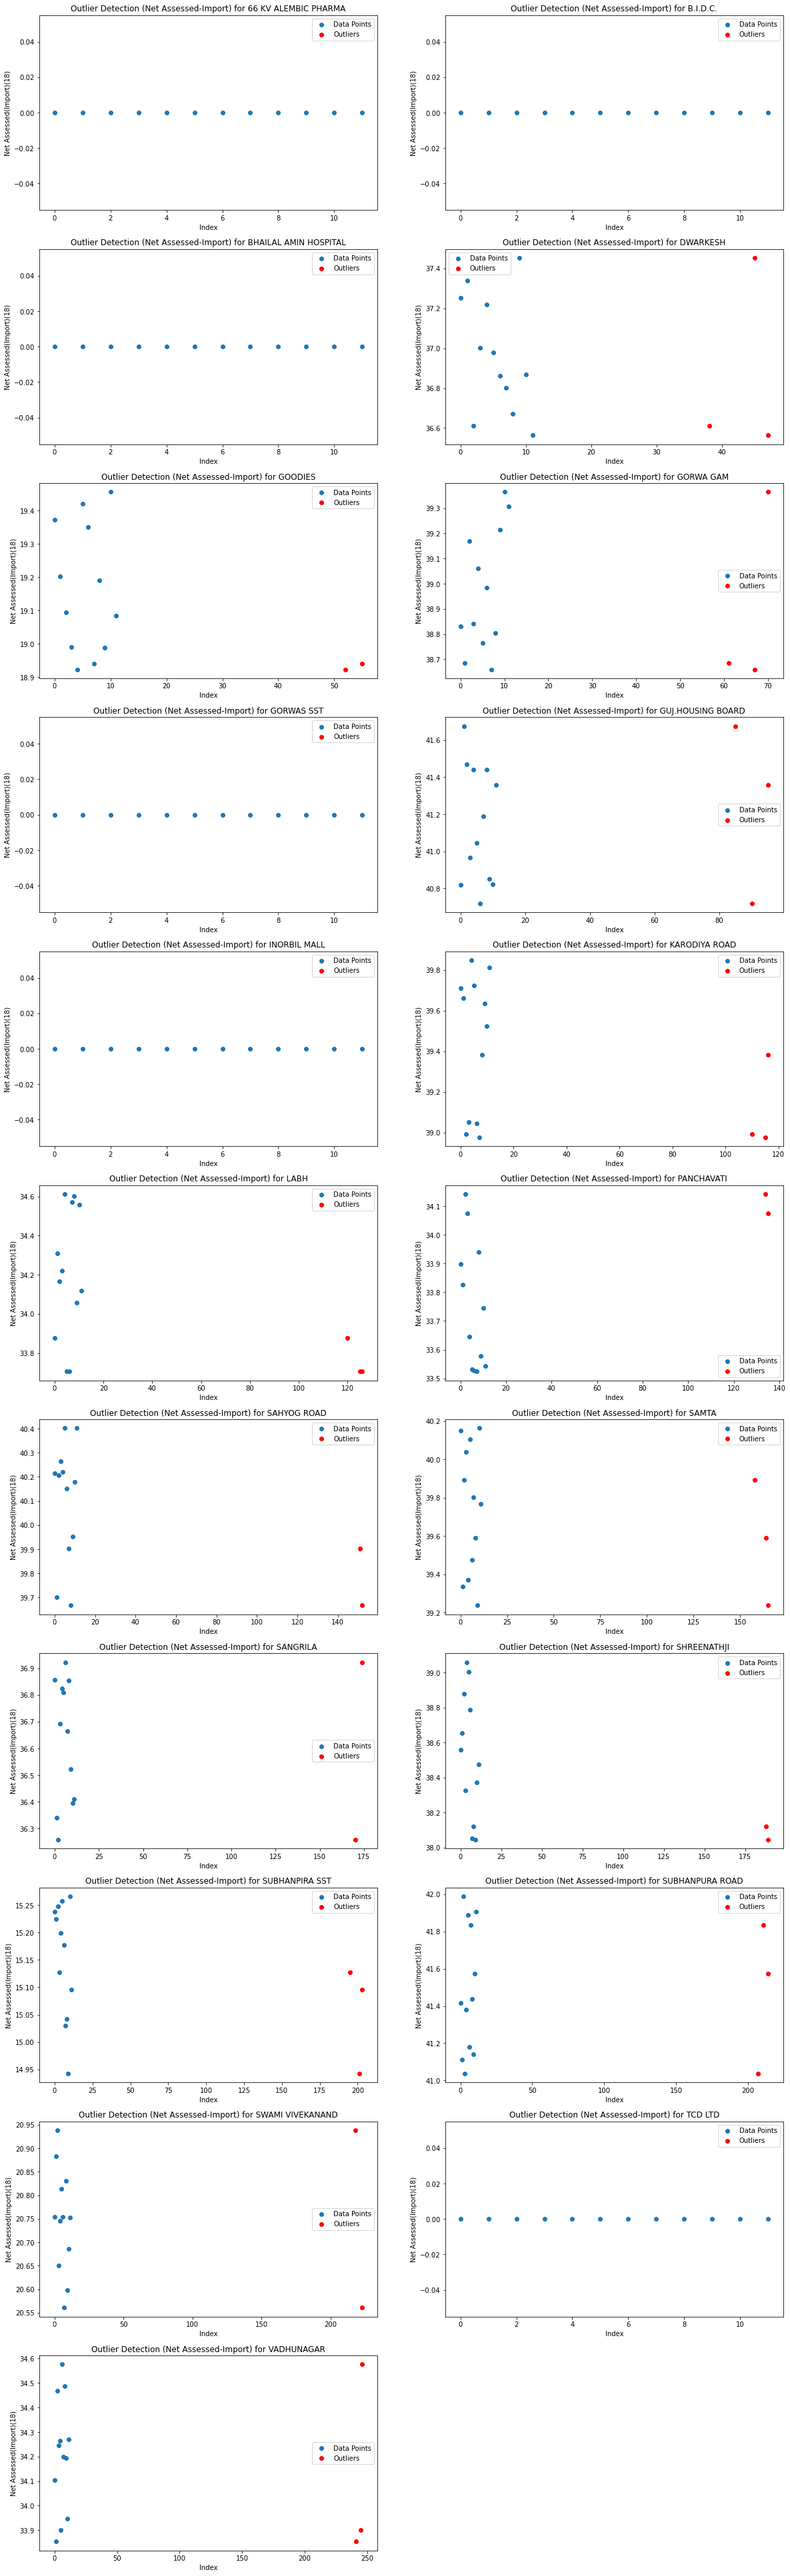

In [53]:
new=pd.DataFrame()
ctr=0
plt.figure(figsize=(20, 70))
for i in feeders:
    ctr+=1
    select_prod = net.loc[net['Feeder name'] == i]
    netvalues = select_prod['Net Assessed(Import)(18)'].values.reshape(-1, 1)
    iso_forest = IsolationForest(n_estimators=7, contamination=0.22, random_state=42)
    outlier_pred = iso_forest.fit_predict(netvalues)
    outliers = select_prod[outlier_pred == -1]
    select_prod.insert(2, 'Outliers', outlier_pred, True)
    new=new.append(select_prod)
    print(i)
    print(outliers[['Feeder name','Net Assessed(Import)(18)']])
    print()
    plt.subplot(11,2,ctr)
    plt.scatter(range(len(netvalues)), netvalues, label='Data Points')
    plt.scatter(outliers.index, outliers['Net Assessed(Import)(18)'], color='red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel('Net Assessed(Import)(18)')
    plt.legend()
    plt.title(f'Outlier Detection (Net Assessed-Import) for {i}')
plt.show()

In [54]:
new.to_csv('gorwa_netassessed_outlier.csv', index=False)
new

Feeder name  Net Assessed(Import)(18)  Outliers
0    66 KV ALEMBIC PHARMA                  0.000000         1
1    66 KV ALEMBIC PHARMA                  0.000000         1
2    66 KV ALEMBIC PHARMA                  0.000000         1
3    66 KV ALEMBIC PHARMA                  0.000000         1
4    66 KV ALEMBIC PHARMA                  0.000000         1
..                    ...                       ...       ...
247            VADHUNAGAR                 34.200574         1
248            VADHUNAGAR                 34.486619         1
249            VADHUNAGAR                 34.192968         1
250            VADHUNAGAR                 33.946102         1
251            VADHUNAGAR                 34.269990         1

[252 rows x 3 columns]

All other columns (other than T&D Loss) are only compare with same feeder in next billing cycle. As the given values are not percentage but absolute values.

## Predicting next values

Algorithms tried for eah column in each feeder to find the best outcomes. Hyperparameter tuning has also been performed on each of the below mentioned algorithms.

* Gradiant Boosting Regression
* Random Forest Regressor
* Polynomial Regression (1,2,3,4)
* Ridge Regression
* K-Nearest Neighbor
* Support Vector Machine Regressor (SVR)
* Multi Layer Perceptron
* ElasticNet Regressor
* XG Boost
* Descision Tree Regression
* Shallow NN

Several of these algorithms performed good on respective columns for respective feeders. However, this approach required 63 different models. This approach proved to be very intensive and impractical. 
Henceforth, multiple regression technique is employed using 2 predictors namely `'Feeder Name'` & `'Month'` and 1 target column `'Total Sentout'`/`'Total Billed'`/`'Unit Loss'`
Hence Following Multiple Non-Liner algorithms are tried out:

* Polynomial Regression (2,3,4)
* SVR
* Random Forest Regressor

It had been clearly observed that `Random forest regressor` performed best. Best R^2 score of former algorithms was observed to be `4%` and `17%` respectively. Best hyperparameters are figured out using `GridSearchCV` 

###### Details of algorithm implementation

1. Data of 2 predictors say `x1` and `x2` are clubbed using `column_stack` that returns a matrix. 
2. This matrix features are transformed into `PolynomialFeatures`
3. Train Test Split
4. Standard Scaling the `X_train` and `x_test`
5. Standard Scaling the `y_train` and rehshaping it on -1 to 1 to convert into 2D matrix and then flatten it to get it back into 1D
6. Apply grid search to find the best hyperparameters

###### Hyperparameters in Random Forest Regression
* `n_estimators`
* `max_depth`
* `min_samples_split`
* `min_samples_leaf`

### Importing Libraries

In [55]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Label Encoding

This is being performed to convert Categorical featurs to Numerical featurs

In [56]:
month_encoder = LabelEncoder()
feeder_encoder = LabelEncoder()

dm['Month'] = month_encoder.fit_transform(dm['Month'])
dm['Feeder name'] = feeder_encoder.fit_transform(dm['Feeder name'])

In [57]:
print("Month Mapping:")
for original, encoded in zip(month_encoder.classes_, month_encoder.transform(month_encoder.classes_)):
    print(f'{original}: {encoded}')

print("\nFeeder name Mapping:")
for original, encoded in zip(feeder_encoder.classes_, feeder_encoder.transform(feeder_encoder.classes_)):
    print(f'{original}: {encoded}')

Month Mapping:
January-February: 0
July-August: 1
March-April: 2
May-June: 3
November-December: 4
September-October: 5

Feeder name Mapping:
66 KV ALEMBIC PHARMA: 0
B.I.D.C.: 1
BHAILAL AMIN HOSPITAL: 2
DWARKESH: 3
GOODIES: 4
GORWA GAM: 5
GORWAS SST: 6
GUJ.HOUSING BOARD: 7
INORBIL MALL: 8
KARODIYA ROAD: 9
LABH: 10
PANCHAVATI: 11
SAHYOG ROAD: 12
SAMTA: 13
SANGRILA: 14
SHREENATHJI: 15
SUBHANPIRA SST: 16
SUBHANPURA ROAD: 17
SWAMI VIVEKANAND: 18
TCD LTD: 19
VADHUNAGAR: 20


### Total Sentout

#### Random Forest Regressor

Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training Mean Squared Error (RF): 39264172.71308542
Training R^2 Score (RF): 0.9971656803693525
Testing Mean Squared Error (RF): 278168620.2310562
Testing R^2 Score (RF): 0.9711795164518654


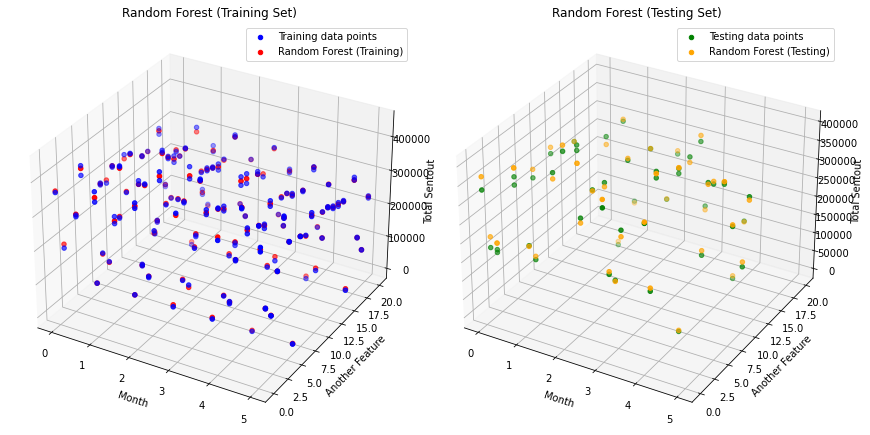

In [58]:
x1 = dm['Month'].values
x2 = dm['Feeder name'].values
X = np.column_stack((x1, x2))
y = dm['Total Sentout(11=8-9+10)'].values

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_X.fit_transform(x_train)
x_test_scaled = scaler_X.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(x_train_scaled, y_train_scaled)

best_rf_ts = grid_search_rf.best_estimator_
print(f'Best parameters for Random Forest: {grid_search_rf.best_params_}')

y_train_pred_scaled_rf = best_rf_ts.predict(x_train_scaled)
y_test_pred_scaled_rf = best_rf_ts.predict(x_test_scaled)

y_train_pred_rf = scaler_y.inverse_transform(y_train_pred_scaled_rf.reshape(-1, 1)).flatten()
y_test_pred_rf = scaler_y.inverse_transform(y_test_pred_scaled_rf.reshape(-1, 1)).flatten()

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f'Training Mean Squared Error (RF): {mse_train_rf}')
print(f'Training R^2 Score (RF): {r2_train_rf}')
print(f'Testing Mean Squared Error (RF): {mse_test_rf}')
print(f'Testing R^2 Score (RF): {r2_test_rf}')

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, color='blue', label='Training data points')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train_pred_rf, color='red', label='Random Forest (Training)')
ax.set_title('Random Forest (Training Set)')
ax.set_xlabel('Month')
ax.set_ylabel('Another Feature')
ax.set_zlabel('Total Sentout')
ax.legend()

ax = fig.add_subplot(122, projection='3d')
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, color='green', label='Testing data points')
ax.scatter(x_test[:, 0], x_test[:, 1], y_test_pred_rf, color='orange', label='Random Forest (Testing)')
ax.set_title('Random Forest (Testing Set)')
ax.set_xlabel('Month')
ax.set_ylabel('Another Feature')
ax.set_zlabel('Total Sentout')
ax.legend()

plt.tight_layout()
plt.show()


In [59]:
new_data = pd.DataFrame({
    'Month': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Feeder name': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] 
})
new_ts=pd.DataFrame({'Feeder name':new_data['Feeder name'],'Month':new_data['Month']})


new_data['Month'] = new_data['Month']
new_data['Feeder name'] = new_data['Feeder name']

x_new = new_data.values

X_new_poly = poly.transform(x_new)

X_new_scaled = scaler_X.transform(X_new_poly)

y_new_pred_scaled = best_rf_ts.predict(X_new_scaled)

y_new_pred = scaler_y.inverse_transform(y_new_pred_scaled.reshape(-1, 1)).flatten()
new_ts.insert(2,'Total Sentout',y_new_pred,True)

print("Total Sentout predictions for next billing cycle:")
for i, pred in enumerate(y_new_pred):
    print(f'{i}: Predicted Total Sentout = {pred}')

Total Sentout predictions for next billing cycle:
0: Predicted Total Sentout = 367838.0357370013
1: Predicted Total Sentout = 197567.78032260278
2: Predicted Total Sentout = 167150.4868547494
3: Predicted Total Sentout = 256373.7304757338
4: Predicted Total Sentout = 376846.7907816878
5: Predicted Total Sentout = 327831.2308243335
6: Predicted Total Sentout = 1552.1513684980455
7: Predicted Total Sentout = 289086.1115420963
8: Predicted Total Sentout = 286416.04507168336
9: Predicted Total Sentout = 314445.939716317
10: Predicted Total Sentout = 147068.26069877704
11: Predicted Total Sentout = 308141.77367398224
12: Predicted Total Sentout = 307306.10171255085
13: Predicted Total Sentout = 289418.3905722662
14: Predicted Total Sentout = 274842.05303287203
15: Predicted Total Sentout = 274883.11682309496
16: Predicted Total Sentout = 9673.087259171472
17: Predicted Total Sentout = 310964.65257221163
18: Predicted Total Sentout = 130323.80380359691
19: Predicted Total Sentout = 75492.301

In [60]:
new_ts

Feeder name  Month  Total Sentout
0             0      0  367838.035737
1             1      0  197567.780323
2             2      0  167150.486855
3             3      0  256373.730476
4             4      0  376846.790782
5             5      0  327831.230824
6             6      0    1552.151368
7             7      0  289086.111542
8             8      0  286416.045072
9             9      0  314445.939716
10           10      0  147068.260699
11           11      0  308141.773674
12           12      0  307306.101713
13           13      0  289418.390572
14           14      0  274842.053033
15           15      0  274883.116823
16           16      0    9673.087259
17           17      0  310964.652572
18           18      0  130323.803804
19           19      0   75492.301357
20           20      0  211784.233255

In [61]:
ts_new=pd.DataFrame({'Feeder name':dm['Feeder name'], 'Month':dm['Month'], 'Total Sentout':dm['Total Sentout(11=8-9+10)']})
new_ts.to_csv('gorwa_totalsentout_prediction.csv', index=False)
ts_new.to_csv('gorwa_totalsentout.csv', index=False)

ts_new

Feeder name  Month  Total Sentout
0              0      0  363541.121701
1              0      1  369351.637868
2              0      2  385032.531335
3              0      3  404855.739906
4              0      4  362809.834707
..           ...    ...            ...
247           20      1  256306.889299
248           20      2  245962.766917
249           20      3  248082.901780
250           20      4  233801.897446
251           20      5  232584.076205

[252 rows x 3 columns]

##### Feature Importance

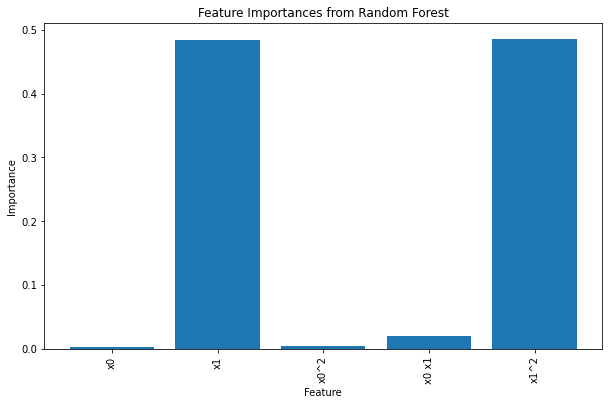

In [62]:
importances = best_rf_ts.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, align='center')
plt.xticks(range(len(importances)), poly.get_feature_names_out(), rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()


### Total Billed

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training Mean Squared Error (RF): 11308243.932656383
Training R^2 Score (RF): 0.9957721382751696
Testing Mean Squared Error (RF): 60380071.05777421
Testing R^2 Score (RF): 0.9661124192023429


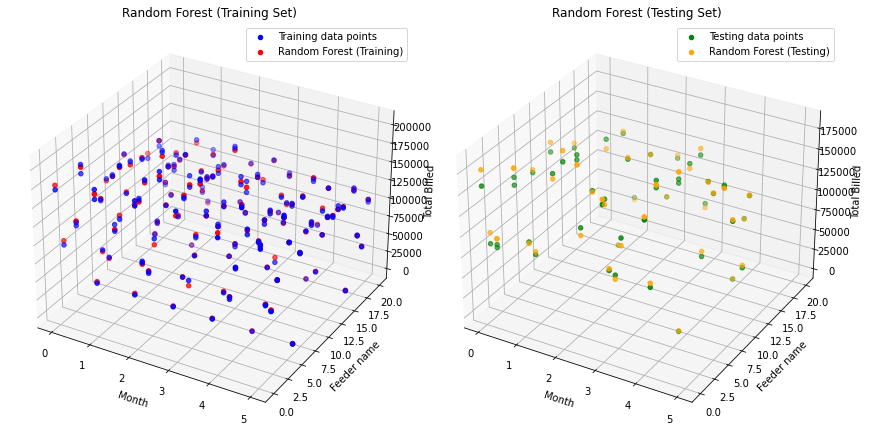

In [63]:
x1 = dm['Month'].values
x2 = dm['Feeder name'].values
X = np.column_stack((x1, x2))
y = dm['Total BIlled UNites(16=12+13+14+15)'].values

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_X.fit_transform(x_train)
x_test_scaled = scaler_X.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(x_train_scaled, y_train_scaled)

best_rf_tb = grid_search_rf.best_estimator_
print(f'Best parameters for Random Forest: {grid_search_rf.best_params_}')

y_train_pred_scaled_rf = best_rf_tb.predict(x_train_scaled)
y_test_pred_scaled_rf = best_rf_tb.predict(x_test_scaled)

y_train_pred_rf = scaler_y.inverse_transform(y_train_pred_scaled_rf.reshape(-1, 1)).flatten()
y_test_pred_rf = scaler_y.inverse_transform(y_test_pred_scaled_rf.reshape(-1, 1)).flatten()

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f'Training Mean Squared Error (RF): {mse_train_rf}')
print(f'Training R^2 Score (RF): {r2_train_rf}')
print(f'Testing Mean Squared Error (RF): {mse_test_rf}')
print(f'Testing R^2 Score (RF): {r2_test_rf}')

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, color='blue', label='Training data points')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train_pred_rf, color='red', label='Random Forest (Training)')
ax.set_title('Random Forest (Training Set)')
ax.set_xlabel('Month')
ax.set_ylabel('Feeder name')
ax.set_zlabel('Total Billed')
ax.legend()

ax = fig.add_subplot(122, projection='3d')
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, color='green', label='Testing data points')
ax.scatter(x_test[:, 0], x_test[:, 1], y_test_pred_rf, color='orange', label='Random Forest (Testing)')
ax.set_title('Random Forest (Testing Set)')
ax.set_xlabel('Month')
ax.set_ylabel('Feeder name')
ax.set_zlabel('Total Billed')
ax.legend()

plt.tight_layout()
plt.show()


In [64]:
new_data = pd.DataFrame({
    'Month': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Feeder name': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] 
})

new=pd.DataFrame({'Feeder name':new_data['Feeder name'],'Month':new_data['Month']})
new_data['Month'] = new_data['Month']
new_data['Feeder name'] = new_data['Feeder name']

x_new = new_data.values

X_new_poly = poly.transform(x_new)

X_new_scaled = scaler_X.transform(X_new_poly)

y_new_pred_scaled = best_rf_tb.predict(X_new_scaled)

y_new_pred = scaler_y.inverse_transform(y_new_pred_scaled.reshape(-1, 1)).flatten()
new.insert(2,'Total Billed',y_new_pred,True)

print("Total Billed predictions for next billing cycle:")

for i, pred in enumerate(y_new_pred):
    print(f'{i}: Predicted Total Billed = {pred}')

Total Billed predictions for next billing cycle:
0: Predicted Total Billed = 176929.60675717884
1: Predicted Total Billed = 95823.66785196753
2: Predicted Total Billed = 82247.88015896053
3: Predicted Total Billed = 108865.37539461511
4: Predicted Total Billed = 175253.86727275205
5: Predicted Total Billed = 150247.94700246476
6: Predicted Total Billed = 3110.673191579117
7: Predicted Total Billed = 112991.47501793406
8: Predicted Total Billed = 130868.73568434836
9: Predicted Total Billed = 130815.91307460578
10: Predicted Total Billed = 69534.31509076974
11: Predicted Total Billed = 147493.10953859572
12: Predicted Total Billed = 127222.63893648531
13: Predicted Total Billed = 126064.95174647261
14: Predicted Total Billed = 124568.36588272525
15: Predicted Total Billed = 124159.03095303215
16: Predicted Total Billed = 2501.777934024096
17: Predicted Total Billed = 129416.77091492842
18: Predicted Total Billed = 63433.44521318745
19: Predicted Total Billed = 39518.347230327214
20: Pre

In [65]:
new

Feeder name  Month   Total Billed
0             0      0  176929.606757
1             1      0   95823.667852
2             2      0   82247.880159
3             3      0  108865.375395
4             4      0  175253.867273
5             5      0  150247.947002
6             6      0    3110.673192
7             7      0  112991.475018
8             8      0  130868.735684
9             9      0  130815.913075
10           10      0   69534.315091
11           11      0  147493.109539
12           12      0  127222.638936
13           13      0  126064.951746
14           14      0  124568.365883
15           15      0  124159.030953
16           16      0    2501.777934
17           17      0  129416.770915
18           18      0   63433.445213
19           19      0   39518.347230
20           20      0   93370.064418

In [66]:
tb_new=pd.DataFrame({'Feeder name':dm['Feeder name'], 'Month':dm['Month'], 'Total Billed':dm['Total BIlled UNites(16=12+13+14+15)']})
new.to_csv('gorwa_totalbilled_prediction.csv', index=False)
tb_new.to_csv('gorwa_totalbilled.csv', index=False)
tb_new

Feeder name  Month   Total Billed
0              0      0  170932.960035
1              0      1  173484.703636
2              0      2  180358.120587
3              0      3  189021.121910
4              0      4  170611.619889
..           ...    ...            ...
247           20      1  112439.964274
248           20      2  107693.077300
249           20      3  108866.885489
250           20      4  102590.070967
251           20      5  102228.061921

[252 rows x 3 columns]

##### Feature Importance

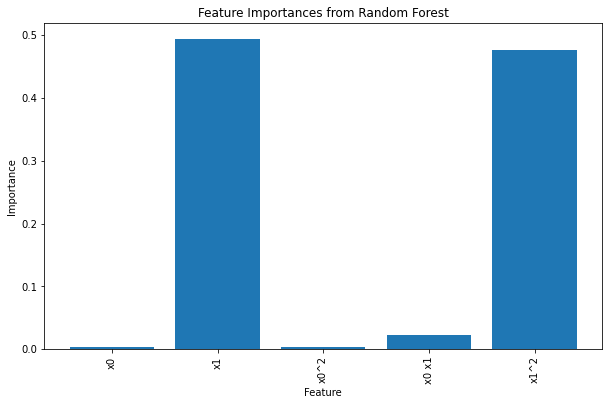

In [67]:
importances = best_rf_tb.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, align='center')
plt.xticks(range(len(importances)), poly.get_feature_names_out(), rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()


### Unit Loss

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Training Mean Squared Error (RF): 907.2206407246044
Training R^2 Score (RF): 0.8988217013778035
Testing Mean Squared Error (RF): 1043.684732334257
Testing R^2 Score (RF): 0.8155213961296077


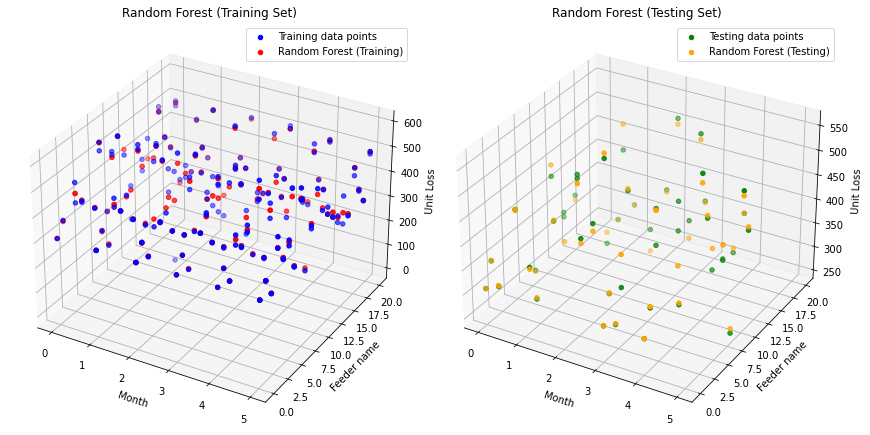

In [68]:
x1 = dm['Month'].values
x2 = dm['Feeder name'].values
X = np.column_stack((x1, x2))
y = dm['Unite Loss(20=11-19)'].values

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_X.fit_transform(x_train)
x_test_scaled = scaler_X.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(x_train_scaled, y_train_scaled)

best_rf_ul = grid_search_rf.best_estimator_
print(f'Best parameters for Random Forest: {grid_search_rf.best_params_}')

y_train_pred_scaled_rf = best_rf_ul.predict(x_train_scaled)
y_test_pred_scaled_rf = best_rf_ul.predict(x_test_scaled)

y_train_pred_rf = scaler_y.inverse_transform(y_train_pred_scaled_rf.reshape(-1, 1)).flatten()
y_test_pred_rf = scaler_y.inverse_transform(y_test_pred_scaled_rf.reshape(-1, 1)).flatten()

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f'Training Mean Squared Error (RF): {mse_train_rf}')
print(f'Training R^2 Score (RF): {r2_train_rf}')
print(f'Testing Mean Squared Error (RF): {mse_test_rf}')
print(f'Testing R^2 Score (RF): {r2_test_rf}')

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, color='blue', label='Training data points')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train_pred_rf, color='red', label='Random Forest (Training)')
ax.set_title('Random Forest (Training Set)')
ax.set_xlabel('Month')
ax.set_ylabel('Feeder name')
ax.set_zlabel('Unit Loss')
ax.legend()

ax = fig.add_subplot(122, projection='3d')
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, color='green', label='Testing data points')
ax.scatter(x_test[:, 0], x_test[:, 1], y_test_pred_rf, color='orange', label='Random Forest (Testing)')
ax.set_title('Random Forest (Testing Set)')
ax.set_xlabel('Month')
ax.set_ylabel('Feeder name')
ax.set_zlabel('Unit Loss')
ax.legend()

plt.tight_layout()
plt.show()

In [69]:
new_data = pd.DataFrame({
    'Month': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Feeder name': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] 
})
new_ul=pd.DataFrame({'Feeder name':new_data['Feeder name'],'Month':new_data['Month']})
new_data['Month'] = new_data['Month']
new_data['Feeder name'] = new_data['Feeder name']

x_new = new_data.values

X_new_poly = poly.transform(x_new)

X_new_scaled = scaler_X.transform(X_new_poly)

y_new_pred_scaled = best_rf_ul.predict(X_new_scaled)

y_new_pred = scaler_y.inverse_transform(y_new_pred_scaled.reshape(-1, 1)).flatten()
new_ul.insert(2,'Unit Loss',y_new_pred,True)
print("Unit Loss predictions for next billing cycle:")
for i, pred in enumerate(y_new_pred):
    print(f'{i}: Predicted Unlit Loss = {pred}')

Unit Loss predictions for next billing cycle:
0: Predicted Unlit Loss = 307.705328533317
1: Predicted Unlit Loss = 355.34752251733613
2: Predicted Unlit Loss = 291.8686980755652
3: Predicted Unlit Loss = 426.69819661302284
4: Predicted Unlit Loss = 380.6010349791371
5: Predicted Unlit Loss = 417.99392228325064
6: Predicted Unlit Loss = 311.97187303215907
7: Predicted Unlit Loss = 552.364631507759
8: Predicted Unlit Loss = 257.87365650626657
9: Predicted Unlit Loss = 457.1014387557977
10: Predicted Unlit Loss = 522.9990225702822
11: Predicted Unlit Loss = 451.4377185912098
12: Predicted Unlit Loss = 267.7179164200231
13: Predicted Unlit Loss = 269.7170441197316
14: Predicted Unlit Loss = 326.7389196664028
15: Predicted Unlit Loss = 339.26828287575984
16: Predicted Unlit Loss = 324.16280164251964
17: Predicted Unlit Loss = 497.3100225759059
18: Predicted Unlit Loss = 373.5057315557128
19: Predicted Unlit Loss = 315.3025417018067
20: Predicted Unlit Loss = 479.79975170971073


In [70]:
new_ul

Feeder name  Month   Unit Loss
0             0      0  307.705329
1             1      0  355.347523
2             2      0  291.868698
3             3      0  426.698197
4             4      0  380.601035
5             5      0  417.993922
6             6      0  311.971873
7             7      0  552.364632
8             8      0  257.873657
9             9      0  457.101439
10           10      0  522.999023
11           11      0  451.437719
12           12      0  267.717916
13           13      0  269.717044
14           14      0  326.738920
15           15      0  339.268283
16           16      0  324.162802
17           17      0  497.310023
18           18      0  373.505732
19           19      0  315.302542
20           20      0  479.799752

In [71]:
ul_new=pd.DataFrame({'Feeder name':dm['Feeder name'], 'Month':dm['Month'], 'Unit Loss':dm['Unite Loss(20=11-19)']})
new_ul.to_csv('gorwa_unitloss_prediction.csv', index=False)
ul_new.to_csv('gorwa_unitloss.csv', index=False)
ul_new

Feeder name  Month   Unit Loss
0              0      0  307.455975
1              0      1  307.412765
2              0      2  307.295164
3              0      3  307.144475
4              0      4  307.461393
..           ...    ...         ...
247           20      1  489.549928
248           20      2  500.278559
249           20      3  508.662431
250           20      4  495.460770
251           20      5  480.758390

[252 rows x 3 columns]

##### Feature Importance

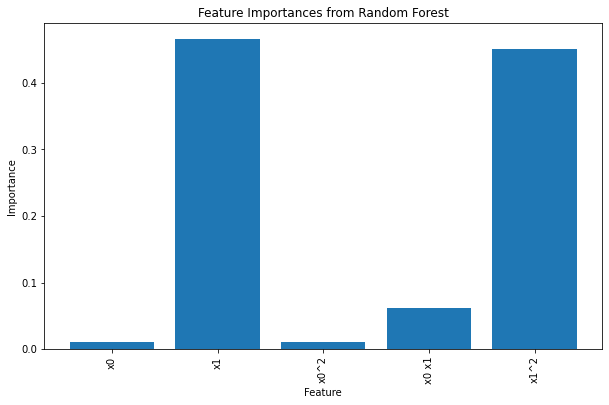

In [72]:
importances = best_rf_ul.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, align='center')
plt.xticks(range(len(importances)), poly.get_feature_names_out(), rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

### T&D Loss

T&D Loss is calculated as Following

T&D Loss = Unit Loss/Total Sentout

Therefore,

Predicted T&D Loss is calculated as:

Pred_T&D_Loss=Pred_Unit_Loss/Pred_Total_Sentout

In [73]:
new_td=pd.DataFrame({'Feeder name':new_data['Feeder name'],'Month':new_data['Month']})
pred_td=new_ul['Unit Loss']/new_ts['Total Sentout']
pred_td
new_td.insert(2,'T&D Loss',pred_td,True)

In [74]:
new_td

Feeder name  Month  T&D Loss
0             0      0  0.000837
1             1      0  0.001799
2             2      0  0.001746
3             3      0  0.001664
4             4      0  0.001010
5             5      0  0.001275
6             6      0  0.200993
7             7      0  0.001911
8             8      0  0.000900
9             9      0  0.001454
10           10      0  0.003556
11           11      0  0.001465
12           12      0  0.000871
13           13      0  0.000932
14           14      0  0.001189
15           15      0  0.001234
16           16      0  0.033512
17           17      0  0.001599
18           18      0  0.002866
19           19      0  0.004177
20           20      0  0.002266

In [75]:
td_new=pd.DataFrame({'Feeder name':dm['Feeder name'], 'Month':dm['Month'], 'T&D Loss':dm['T%D Loss(%)(21=20/11)']})
new_td.to_csv('gorwa_tanddloss_prediction.csv', index=False)
td_new.to_csv('gorwa_tanddloss.csv', index=False)
td_new

Feeder name  Month  T&D Loss
0              0      0  3.301997
1              0      1  3.301997
2              0      2  3.301997
3              0      3  3.301997
4              0      4  3.301997
..           ...    ...       ...
247           20      1  4.345859
248           20      2  4.468562
249           20      3  4.517092
250           20      4  4.498970
251           20      5  4.399187

[252 rows x 3 columns]

#### Summary of the trained models

Total of 3 regression (prediction) models are trined. All of them are using `RandomForest` as the main model and using `PolynomialFeatures`. Details of the 3 models are:

1. best_rf_ts
    * `max_depth`: None
    * `min_samples_leaf`: 1
    * `min_samples_split`: 5
    * `n_estimators`: 200
2. best_rf_tb
    * `max_depth`: None
    * `min_samples_leaf`: 1
    * `min_samples_split`: 2
    * `n_estimators`: 100
3. best_rf_ul
    * `max_depth`: None
    * `min_samples_leaf`: 2
    * `min_samples_split`: 5
    * `n_estimators`: 200
    
P.S. As `RandomForest` uses bagging approach and is ensamble of `DecisionTree` which is an Non-paramatric and tree-like approach that is based on recurssion, the hyperparameters may vary on ever run-time. For the same reason `GridSearchCV` has been kept in the production code as well 

Last modified by *Honey Patel* on 29/08/2024 at 12:45